# Table of Contents


1. [About Dataset](#1)     
1. [Problem Statement](#2) 
1. [Approach](#3)    
1. [Importing Libraries](#4) 
1. [Identifying Dataset](#5)

    1. [Loading the Dataset](#5a)
    1. [Dataset Information](#5b)
    1. [Missing Values/Null Values](#5c)
    1. [Checking for Duplicate Values](#5d)
    1. [Summary of the Section](#5e) 
 
1. [Data Preprocessing](#6)
    1. [Data Type Correction](#6a)
    1. [Extracting New Features](#6b)
    1. [Checking Unique Values](#6c)
    1. [Summary of the Sections](#6d)   
1. [Data Visualization](#7)
    1. [Visualizing Relationship between Several Variables](#7a)
    1. [Sum of Load vs Avg.of Load for Month,Year comparability](#7b)  
    1. [Outliers](#7c)
    1. [Summary of the Section](#7d) 

1. [Feature Engineering](#8)
    1. [Weekend_Weekday , PublicHolidays ,Date](#8a)
    1. [Encoding Categorical Features](#8b)
    1. [Correlations Matrix](#8c)
    1. [Observation from Correlation Matrix](#8d)
    1. [Removing  Multicorrelated and Loosely Connected Features](#8e)
    1. [Identifying important features with XGBoost Algorithm](#8f)
    1. [Normalization](#8g)  
    1. [Dimesionality Reduction](#8h)  
    1. [Splitting Data](#8i)  
    1. [Summary of the Section](#8j)
    
1. [Appoach 1 - Regression with Machine Learning ](#9)      
    1. [Grid Search based Hyperparameter Tuning with 5-Fold Cross-Validation](#9a) <br>
       [1. Linear Regression](#91) <br>
       [2. Ridge Regression](#92) <br> 
       [3. Lasso Regression](#93) <br>
       [4. Support Vector Regressor](#94) <br> 
       [5. Random Forest Regressor](#95) <br>
       [6. XGB regressor](#96) <br>
       [7. Cat Boost Regressor](#97) <br>
       [8. Light GBM Regressor](#98) <br>
       [9. Gradient Boost Regressor](#99)<br>
       [10. Ensemble Voting Regressor](#910)<br>   
    1. [Training Testing Scores of Machine Learning Models Experimented](#9b)  
    1. [Summary of the Section](#9c)
    
1. [Appoach 2 - Regression with Deep Neural Network](#10)
    1. [Neural Network Mode](#10a)
    1. [Training Testing Scores of all Models Experimenteds](#10b)
    1. [Summary of the Section](#10c)
   
1. [Appoach 3 - Time Series Model](#11)   
    1. [Time Series SARIMA Mode](#11a)
    1. [Evaluation of the Time Series Model](#11b)
    1. [Summary of the Section](#11c)

1. [Saving the Model](#12)       
1. [Predictions from the Model](#13)  
1. [StreamLit Application](#14)
1. [Future Work  and Further Improvements](#15) 
1. [Answers to the Problem Statement](#16) 
 
     

<a id="1"></a> 
# 1. About Dataset

<h4> Background </h4>

Industries, companies, cities, households, etc., all consume energy. Both consumers and producers can benefit greatly from accurate estimates of 
future consumption. Therefore, the forecasts are also a key input of the decision-making process.
This particular project is about a Norweigien robotic warehouse where they want to predict their electricity load for the given hour. If the predicted load is higher than a decided threshold they will activate solar powered electricity as well for the continiuos operations.


<h4> Variables Description </h4>

• Date - Date(year-month-day) <br>
• Load - Electricity load in Mwh  <br>
• Temperature - Temperature for the day  <br>
• Cloudiness - Extent to which the atmosphere is covered by cloud.Measured in oktas  <br>
• Irradiation - Radiant flux received by a surface per unit area. Measure in Wh/m2 <br>
• Public Holidays - Whether Holiday(=1) or Not (=0)  <br>

<a id="2"></a>
# 2. Problem Statement

• Goal - By using appropriate features I need to predict the load for given time.<br>
• Target / varibale to Predict - Load

Addressing the requirements

• Plot and analyze the data and check the data quality <br>
• Build a model and forecast for the next given hour <br>
• Identify the normal and anomalous behavior on the time-series dataset that could act as early indicators for quality degradation. <br>
• Provide evaluation metrics for the models <br>

<a id="3"></a>
# 3. Approach 

In order to check the approppriate Model for this problem 3 approcaches will be used as follows <br><br>
#### 1. Approach 01  -  Machine Learning <br>

• 9 Regression machine learning alorithms were impletmented with grid search based hyperparameter tuning with cross validations to find the best performing version of each model<br>
• 3 Best performing models were reused for  voting based regression alorithm where output of the 3 best models was considered for the final output value <br>

#### 2. Approach 02  -  Regression based Deep Learning <br>
• Deep neural network was implmeneted and evalued against the regression machine laearning that was previously implemented.

#### 3. Approach 03  -  Time Series  Modeling<br>
• This Dataset contain data how load variated with time and other features.Hence this problem can be also  considered as a time series problem as well

<a id="4"></a> 
# 4. Importing Libraries

In [1]:
#data visualization libraries(matplotlib,seaborn)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np

# Datetime library for manipulating Date columns.
from datetime import datetime

# from sci-kit library scaling, transforming and labeling functions are brought
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# spilitting data
from sklearn.model_selection import train_test_split

# Library for set hyperparameters and optimization
from sklearn.model_selection import KFold, GridSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
 
# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

import time

<a id="5"></a> 
# 5. Identifying Dataset

<a id="5a"></a> 
<h3>Loading the Dataset </h3>

In [2]:
df = pd.read_csv("./Electricity-Load 1.csv")

df.head()

,Date,Load,Temperature,Cloudiness,Irradiation,PublicHolidays
0,2013-01-01 00:00:00.000,14859.10,4.40,4.00,0.20,1
1,2013-01-01 01:00:00.000,14116.10,4.70,4.70,0.20,1
2,2013-01-01 02:00:00.000,13400.80,4.70,4.70,0.20,1
3,2013-01-01 03:00:00.000,12883.60,4.70,4.70,0.20,1
4,2013-01-01 04:00:00.000,12717.30,4.40,4.20,0.20,1


In [3]:
print(f'Total observation and feature: {df.shape}')

Total observation and feature: (16976, 6)


<a id="5b"></a> 
<h3>Dataset Information </h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16976 entries, 0 to 16975
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            16976 non-null  object 
 1   Load            16976 non-null  float64
 2   Temperature     16976 non-null  float64
 3   Cloudiness      16976 non-null  float64
 4   Irradiation     16976 non-null  float64
 5   PublicHolidays  16976 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 795.9+ KB


<a id="5c"></a>
<h3>Missing Values/Null Values </h3>

In [5]:
df.isnull().sum()

Date              0
Load              0
Temperature       0
Cloudiness        0
Irradiation       0
PublicHolidays    0
dtype: int64

<a id="5d"></a>
<h3>Checking for Duplicate Values </h3>

In [6]:
# Dataset Duplicate Value Count

print(f"Data is duplicated ? {df.duplicated().value_counts()},unique values with {len(df[df.duplicated()])} duplication")

Data is duplicated ? False    16976
dtype: int64,unique values with 0 duplication


<a id="5e"></a>
<h3> Summary of the Section  </h3>

• There are 16976 observation and 6 features. <br>
• There is no null values.<br>
• Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data. <br>
• Date has object data type it should be datetime data type.<br>

<a id="6"></a> 
# 6. Data Preprocessing

<a id="6a"></a>
<h3>Data Type Correction </h3>

In [7]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

<a id="6b"></a>
<h3>Extracting New Features </h3>

In [8]:
#Extracting year
df['Year'] = df['Date'].dt.year

#Extracting month from date column
df['Month'] = pd.to_datetime(df['Date']).dt.month

#Extrating day from date
df['Day_of_Month'] = df['Date'].dt.day

#Extracting day name from date
df['Day_of_the_Week'] = df['Date'].dt.day_name()

#Extracting hour  name from date
df['Hour'] = df['Date'].dt.hour

#Extracting weekday or weekend  from date 
df['Weekday_Weekend'] = df['Day_of_the_Week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekday')

#Extracting weekday or weekend and merging the data with public holiday to get whether its working day or not from date
df['Working_Day'] = df.apply(lambda row: 'Non_Working_Day' if row['Day_of_the_Week'] in ['Saturday', 'Sunday'] else ('Non_Working_Day' if row['PublicHolidays'] == 1 and row['Day_of_the_Week'] not in ['Saturday', 'Sunday'] else 'Working_Day'), axis=1)


In [9]:
df.head(100)

,Date,Load,Temperature,Cloudiness,Irradiation,PublicHolidays,Year,Month,Day_of_Month,Day_of_the_Week,Hour,Weekday_Weekend,Working_Day
0,2013-01-01 00:00:00,14859.10,4.40,4.00,0.20,1,2013,1,1,Tuesday,0,Weekday,Non_Working_Day
1,2013-01-01 01:00:00,14116.10,4.70,4.70,0.20,1,2013,1,1,Tuesday,1,Weekday,Non_Working_Day
2,2013-01-01 02:00:00,13400.80,4.70,4.70,0.20,1,2013,1,1,Tuesday,2,Weekday,Non_Working_Day
3,2013-01-01 03:00:00,12883.60,4.70,4.70,0.20,1,2013,1,1,Tuesday,3,Weekday,Non_Working_Day
4,2013-01-01 04:00:00,12717.30,4.40,4.20,0.20,1,2013,1,1,Tuesday,4,Weekday,Non_Working_Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2013-01-04 23:00:00,17581.50,4.70,7.40,0.20,0,2013,1,4,Friday,23,Weekday,Working_Day
96,2013-01-05 00:00:00,16250.00,4.70,7.40,0.20,0,2013,1,5,Saturday,0,Weekend,Non_Working_Day
97,2013-01-05 01:00:00,15505.90,5.50,7.70,0.20,0,2013,1,5,Saturday,1,Weekend,Non_Working_Day
98,2013-01-05 02:00:00,15140.80,5.50,7.70,0.20,0,2013,1,5,Saturday,2,Weekend,Non_Working_Day


<a id="6c"></a>
<h3>Checking Unique Values</h3>

In [10]:
for i in df.columns.tolist():
    print(f"No. of unique values in {i} is {df[i].nunique()}.")

No. of unique values in Date is 16976.
No. of unique values in Load is 15676.
No. of unique values in Temperature is 408.
No. of unique values in Cloudiness is 81.
No. of unique values in Irradiation is 10.
No. of unique values in PublicHolidays is 2.
No. of unique values in Year is 2.
No. of unique values in Month is 12.
No. of unique values in Day_of_Month is 31.
No. of unique values in Day_of_the_Week is 7.
No. of unique values in Hour is 24.
No. of unique values in Weekday_Weekend is 2.
No. of unique values in Working_Day is 2.


<a id="6d"></a>
<h3>Summary of the Section </h3>

• Date field is convereted to Datetime field from object varibale.<br>
• New feature columns are created based on the exsisiting features for higher interpretability.<br>
• **Year**,**Month** ,**Day_of_Month (1-30)**,**Day_of_week(Monday-Sunday)** created based on the Date column<br>
• **Weekday_Weekend** column was created based on Day_of_week  column <br><br>

Working_Day column was created with the following logic<br> 
• **Weekday_Weekend**=Weekend then **Working_Day**=Non_Working_Day<br>
• **Weekday_Weekend**=Weekday and **PublicHolidays**=0 then **Working_Day**=Working_Day<br>
• **Weekday_Weekend**=Weekday and **PublicHolidays**=1 then **Working_Day**=Non_Working_Day<br>


<a id="7"></a>
# 7. Data Visualization

<a id="7a"></a>
<h3>Visualizing Relationship between Several Variables</h3>

Each possible graph is visualized with observations followed by the story behind it

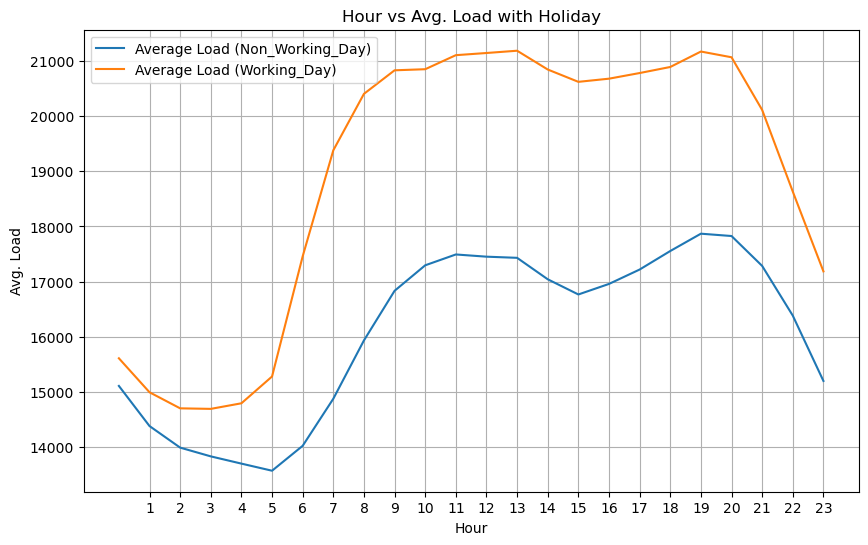

In [11]:
# Calculate average load for each hour and holiday status
average_load = df.groupby(['Hour', 'Working_Day'])['Load'].mean().unstack()
plt.figure(figsize=(10, 6))

# Plotting average line for each category
for column in average_load.columns:
    plt.plot(average_load.index, average_load[column], label=f'Average Load ({column})')

plt.title('Hour vs Avg. Load with Holiday')
plt.xlabel('Hour')
plt.ylabel('Avg. Load')
plt.legend()
plt.grid(True)
# Setting x-ticks
plt.xticks(range(1, 24))
plt.show()



**Observation**<br>
•  Pattern of curve of the load distribured among hours shows similar in Working_Day and Non_working_Day, but Working_Day load curve is much higher than Non_Working_Day<br>
•  It concludes that Working_Day load is much higher than Non_working_Day.<br><br>
**Story telling** -<br>
Factories and offices are active on Working_Days resulting more energy use than Nonworking days were offices and factories are closed<br>

### Load vs Temperature

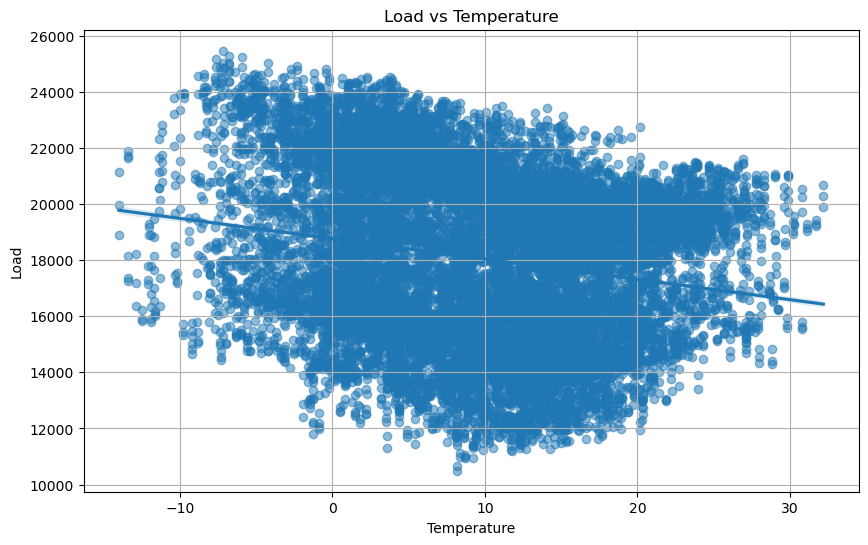

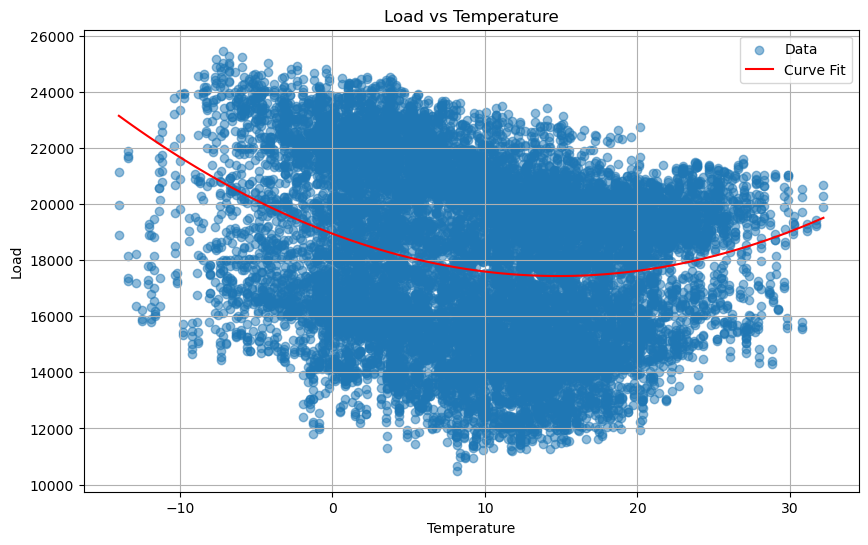

In [12]:
# Visualizing the Linear relationship between Load vs Temperature
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Temperature', y='Load', data=df, scatter_kws={'alpha':0.5})
plt.title('Load vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Load')
plt.grid(True)
plt.show()


# Visualizing the Non_Linear relationship between Load vs Temperature
plt.figure(figsize=(10, 6))
x = df['Temperature']
y = df['Load']

# Fit a quadratic polynomial curve to the data
p = np.polyfit(x, y, 2)
curve_x = np.linspace(min(x), max(x), 100)
curve_y = np.polyval(p, curve_x)

# Plot the scatter plot and the curve fit
plt.scatter(x, y,  alpha=0.5, label='Data')
plt.plot(curve_x, curve_y, color='red', label='Curve Fit')
plt.title('Load vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Load')
plt.grid(True)
plt.legend()
plt.show()

**Observation**

• First visualized the scatter plot for Load vs Temperature.Observation was that the graph is more towards non linear graph than a simple linear graph<br>
• Secondly  marked non linear curved to it and that non linear curve was able to best fit with the data.<br><br>
**Story telling** -<br>
When there is less temperature the load will be high as many will be using heaters  to make the surrounding warm.But when the temperature is around 10, it is moderate temperature which is comforatable and no heaters or coolers are needed.
Once the temperature rises load is rising again as many will be using coolers and air conditioners to make themselves cool and comfortable.This can be easily visualized with the non linear curve on Load vs Temperature
 

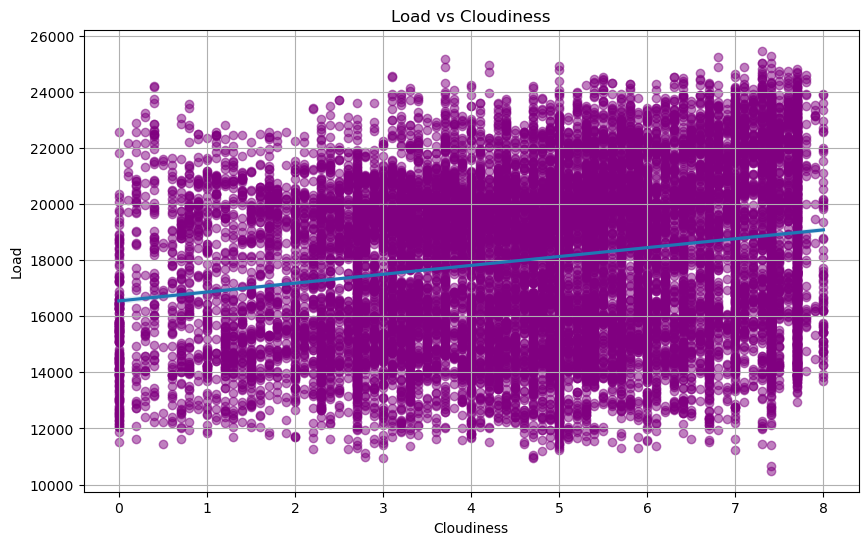

In [13]:
# Visualizing the relationship between Load vs Cloudiness
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Cloudiness', y='Load', data=df, scatter_kws={'color': 'purple','alpha':0.5})
plt.title('Load vs Cloudiness')
plt.xlabel('Cloudiness')
plt.ylabel('Load')
plt.grid(True)
plt.show()


**Observation**

• First the scatter plot was visualized for Load vs cloudliness.It was observed  that simple linear graph where cloudiness has with positive relationhip with Load.<br><br>
**Story telling** -<br>
When there is more clouds in the sky the environment will be dark and need more light .Hence the load will be high as many will be lights to keep the surrounding bright

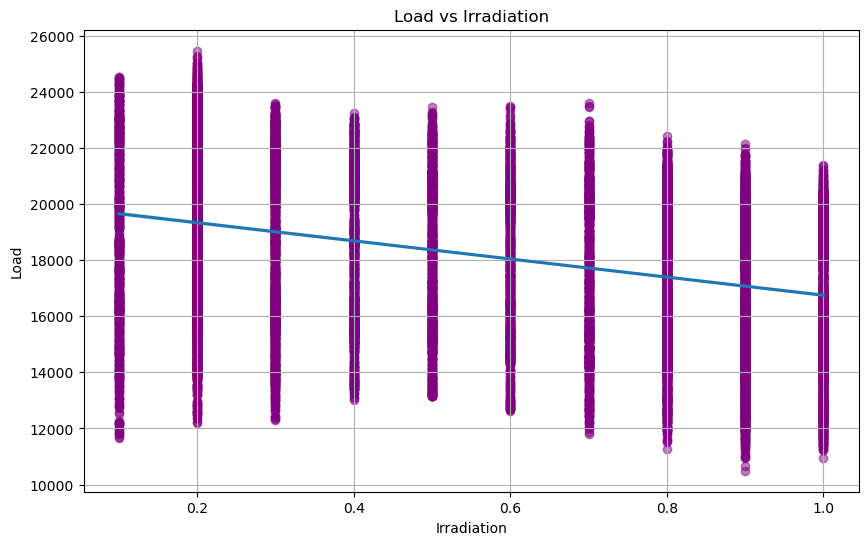

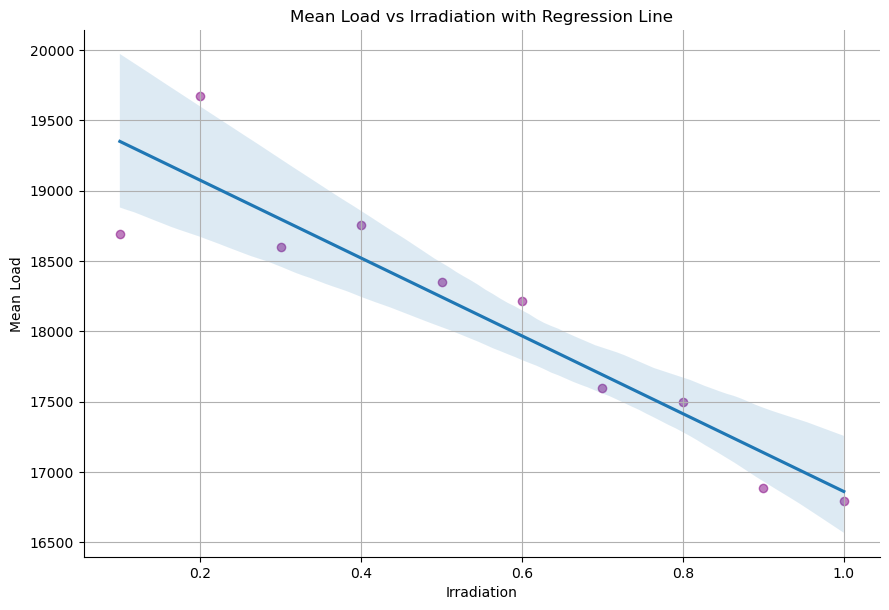

In [14]:
# Visualizing the relationship between Load vs Irradiation
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Irradiation', y='Load', data=df, scatter_kws={'color': 'purple','alpha':0.5})
plt.title('Load vs Irradiation')
plt.xlabel('Irradiation')
plt.ylabel('Load')

plt.grid(True)
plt.show()



# Visualizing the relationship between Mean Load vs Irradiation with regression line
mean_load_irradiation = df.groupby('Irradiation')['Load'].mean().reset_index()
sns.lmplot(x='Irradiation', y='Load', data=mean_load_irradiation, height=6, aspect=1.5, scatter_kws={'color': 'purple', 'alpha': 0.5})
plt.title('Mean Load vs Irradiation with Regression Line')
plt.xlabel('Irradiation')
plt.ylabel('Mean Load')
plt.grid(True)
plt.show()

**Observation**

• First  scatter plot for Load vs Irradiation was visualized .It was observed that it is a simple linear graph where Irradiation has with negative relationhip with Load.<br>
• Secondly  mean load with each irradiation level was visualized and the second graph was created. it was observed that strong negative relationship between mean load with irradiation<br><br>
**Story telling** -<br>
When there is more Irradiation, more light flux coming to the earth making the environment brighter.Hence less energy load is need to make the surroundings lighted.

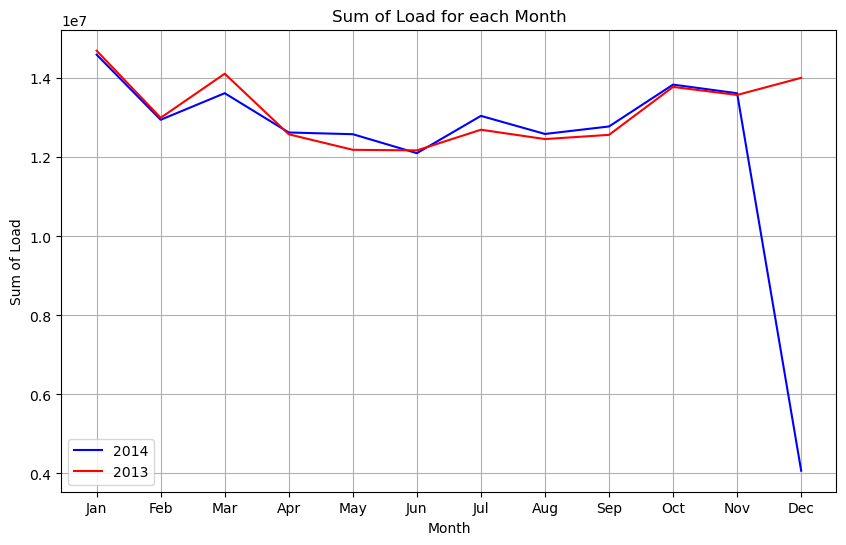

In [15]:
# Visualizing the relationship between Sum of Load vs Month

# Filter data for the year 2014
year_2014_data = df[df['Year'] == 2014]

# Calculate sum of load for each month of the year 2014
sum_load_2014 = year_2014_data.groupby('Month')['Load'].sum()

# Filter data for the year 2013
year_2013_data = df[df['Year'] == 2013]

# Calculate sum of load for each month of the year 2013
sum_load_2013 = year_2013_data.groupby('Month')['Load'].sum()


plt.figure(figsize=(10, 6))

plt.plot(sum_load_2014.index, sum_load_2014, label='2014', color='blue') # Plot line for 2014
plt.plot(sum_load_2013.index, sum_load_2013, label='2013', color='red')# Plot line for 2013
plt.title('Sum of Load for each Month')
plt.xlabel('Month')
plt.ylabel('Sum of Load')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


**Observation**

• Sum of load with Month is visualized considering the year as the legend.There was a huge drop was marked in Month of December for the year 2014.<br>
• After carefully observing the dataset I was able to find that there is data only upto 9 th  Decemeber for year 2014, but there is data until 31 Decemeber in year 2013<br>
• Secondly it is observed that( with year 2013) that  from October to March the Load is high<br><br>


 <a id="7b"></a>
<h3>Sum of Load vs Avg.of Load for Month,Year comparability</h3>

#### Sum of load
*Issue 01* <br>
•  After  carefully considering  the data it was observed that in 2014 Decemeber data is only upto 9 Decemeber .But in 2013 Decemebr has data till 31 December <br>
•  Hence sum of loads over the months for these 2 years are not direclty comparable.<br>

*Issue 02* <br>
•  Some months have 30 days and some months have 31 days and February has 28 days in both 2013 and 2014.Therefore if we consider the sum of load , the months which has 31 days have load collected over 31 days, while other months have load summed for only 30 days or 28 days.<br>
•  Hence no proper conclusion can be made with sum of load over months considering 2013,2014 <br>

#### Avg.of Load
•   If Average or mean load is consider these 2 issue are  mitigated <br>
•   Average will have the sum of load divided by number of occurances .For 2014 Decemebr data, it will consider the sum of available load  data and divide by availabe data points and have a one value which is the average of that month.Therefore having less nuber of data for 2014 Decemeber will not have much effect on the graph<br>
•   When Average is considered it will divide the sum of load by available data points .Hence having 31 days,30 days or 28 days will not make the analysis bias<br>

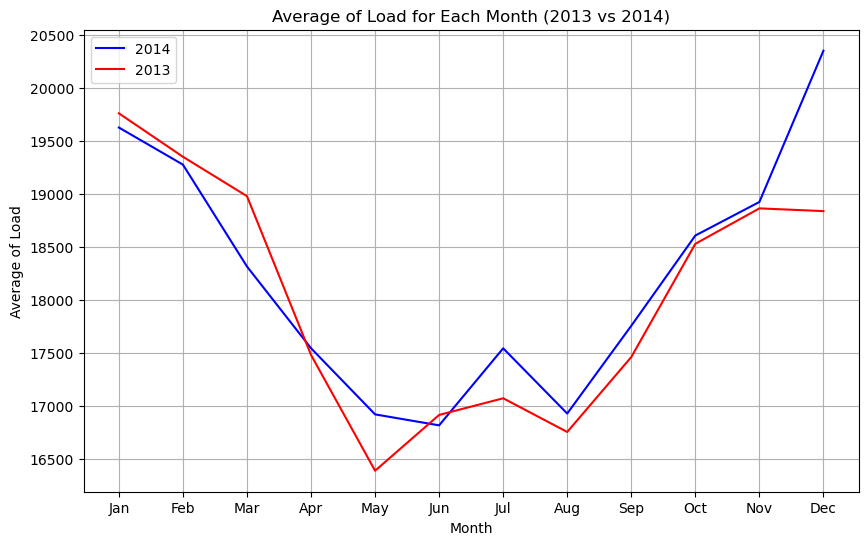

In [16]:
# Filter data for the year 2014
year_2014_data = df[df['Year'] == 2014]

# Group by month and calculate the sum of load for each month in 2014
sum_load_2014 = year_2014_data.groupby('Month')['Load'].mean()

# Filter data for the year 2013
year_2013_data = df[df['Year'] == 2013]

# Group by month and calculate the sum of load for each month in 2013
sum_load_2013 = year_2013_data.groupby('Month')['Load'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot sum of load for 2014
plt.plot(sum_load_2014.index, sum_load_2014, label='2014', color='blue')

# Plot sum of load for 2013
plt.plot(sum_load_2013.index, sum_load_2013, label='2013', color='red')

plt.title('Average of Load for Each Month (2013 vs 2014)')
plt.xlabel('Month')
plt.ylabel('Average of Load')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


**Observation**

• From October to March has highest Average load when compared to other Months <br>
• From April to September there is less Average load.<br>
• In month of June the 2014 and 2013 years shows contradictory patterns (In 2013 Avg load of June is higher than May and in 2014 it is vise versa)<br>

**Story telling** -<br>
For Norway October to March  period is the winter season. As there is less light and less temperature during this season the energy load will be high due to high usage of heaters and lights.Either 2013 or 2014 June there was special circumustance which lead to change of energy usage.This need to be validated  by checking with external factors like special onetime occasion, festival has happened in June month of 2013 or 2014 

 <a id="7c"></a>
<h3> Outliers </h3>

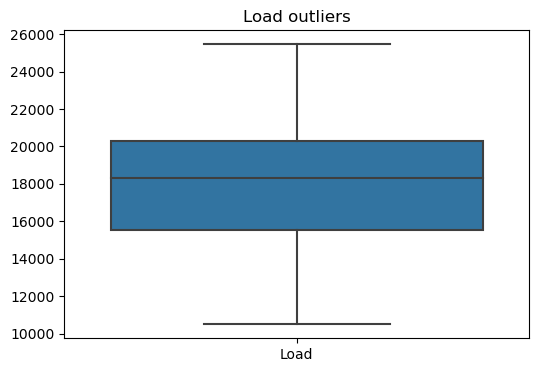

In [17]:
#Outlier Identification
fig,ax=plt.subplots(figsize=(6,4))
#Boxplot for total_count outliers
sns.boxplot(data=df[['Load']])
ax.set_title('Load outliers')
plt.show()

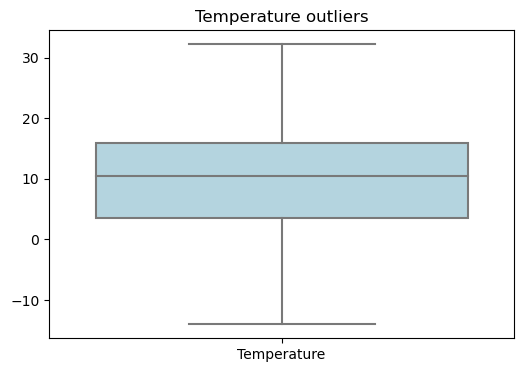

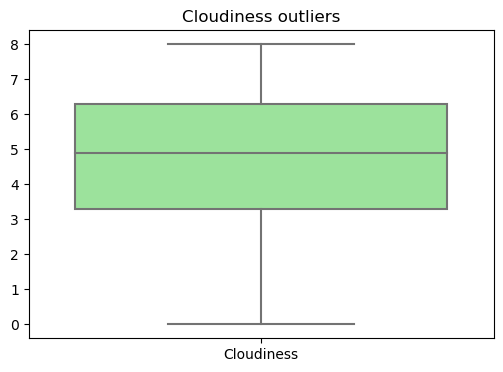

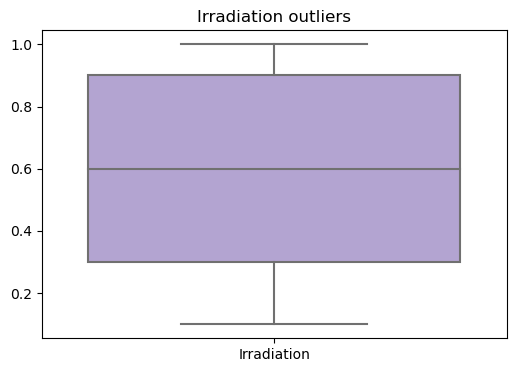

In [18]:
# Plot 1: Temperature outliers (blue)
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df[['Temperature']], color='#ADD8E6')
ax.set_title('Temperature outliers')
plt.show()

# Plot 2: Cloudiness outliers (green)
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df[['Cloudiness']], color='#90EE90')
ax.set_title('Cloudiness outliers')
plt.show()

# Plot 3: Irradiation outliers (red)
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df[['Irradiation']], color='#B19CD9')
ax.set_title('Irradiation outliers')
plt.show()


In [19]:
# total outliers for each column
print('Total outliers for each column')
numerical_vars = ['Temperature','Cloudiness', 'Irradiation']
Q1 = df[numerical_vars].quantile(0.25)
Q3 = df[numerical_vars].quantile(0.75)
IQR = Q3 - Q1
((df[numerical_vars] < (Q1 - 1.5 * IQR)) | (df[numerical_vars] > (Q3 + 1.5 * IQR))).sum()

Total outliers for each column


Temperature    0
Cloudiness     0
Irradiation    0
dtype: int64

**Observation**

• Box plot was created to detect outliers. Also statiscal method was also use to check for outliers <br>

**Story telling** -<br>

Outliers are checked visually and statistically and No outliers were detected.

<a id="7d"></a>
<h3> Summary of the section</h3>

In this section dataset was visualized for better understanding and to derive  insights <br><br>
• How *Working_Day* and *Non_Working_Day* average load is distributed among the hours was visualized.It was concluded that the trend pattern is same for *Working_Day* and *Non_Working_Day* ,but  *Working_Day* has high usage of Load compared to *Non_Working_Day*.<br><br>
• Load vs Temperature graph has polinormial distribution of data which can be better explained with the temperature variation and its effects to the environment. <br><br>
• Load and Cloudiness has strong positive relationship<br><br>
• Irradiation and Average load has strong negative relationship<br><br>
• Average load distributed among months 2013,2014 shows a seasonal trend<br><br>
• No outliers were detected from both statistically or visually<br><br>

<a id="8"></a>
# 8. Feature Engineering

<a id="8a"></a>
<h3>Weekend_Weekday , PublicHolidays ,Date </h3>

 **Weekend_Weekday** and **PublicHolidays** are dropped from the dataset as a new column **Working_Day** is created combining the information  on  Weekend_Weekday and public holidays.
 
 **Date** column was dropped as the information of this column was seperated in to year, month, day and hour seperately

In [20]:
df_r = df.drop(columns=['Weekday_Weekend', 'PublicHolidays','Date'])
df_r 

,Load,Temperature,Cloudiness,Irradiation,Year,Month,Day_of_Month,Day_of_the_Week,Hour,Working_Day
0,14859.10,4.40,4.00,0.20,2013,1,1,Tuesday,0,Non_Working_Day
1,14116.10,4.70,4.70,0.20,2013,1,1,Tuesday,1,Non_Working_Day
2,13400.80,4.70,4.70,0.20,2013,1,1,Tuesday,2,Non_Working_Day
3,12883.60,4.70,4.70,0.20,2013,1,1,Tuesday,3,Non_Working_Day
4,12717.30,4.40,4.20,0.20,2013,1,1,Tuesday,4,Non_Working_Day
...,...,...,...,...,...,...,...,...,...,...
16971,16457.30,1.30,7.00,0.10,2014,12,9,Tuesday,3,Working_Day
16972,16744.80,-0.10,5.90,0.10,2014,12,9,Tuesday,4,Working_Day
16973,17577.10,-0.10,5.90,0.10,2014,12,9,Tuesday,5,Working_Day
16974,20253.70,-0.10,5.90,0.10,2014,12,9,Tuesday,6,Working_Day


<a id="8b"></a>
<h3>Encoding Categorical Features </h3>

In [21]:
#identifing cateforical features
cat_category = df_r.select_dtypes(include = 'object')
print(f'Categorial Features: {cat_category.columns.to_list()}')

Categorial Features: ['Day_of_the_Week', 'Working_Day']


<h4>Label Encoding</h4>

In [22]:
# Using 0 or 1 to encode the feature Working_Day as it has only 2 labels. 0- Non_Working_Day   , 1- Working_Day

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_r['Working_Day'] = label_encoder.fit_transform(df_r['Working_Day'])

<h4>One-hot Encoding</h4>

In [23]:
#Creating one hot encodording to Day_of_the_Week
df_r = pd.get_dummies(df_r, columns=['Day_of_the_Week'])
df_r

,Load,Temperature,Cloudiness,Irradiation,Year,Month,Day_of_Month,Hour,Working_Day,Day_of_the_Week_Friday,Day_of_the_Week_Monday,Day_of_the_Week_Saturday,Day_of_the_Week_Sunday,Day_of_the_Week_Thursday,Day_of_the_Week_Tuesday,Day_of_the_Week_Wednesday
0,14859.10,4.40,4.00,0.20,2013,1,1,0,0,0,0,0,0,0,1,0
1,14116.10,4.70,4.70,0.20,2013,1,1,1,0,0,0,0,0,0,1,0
2,13400.80,4.70,4.70,0.20,2013,1,1,2,0,0,0,0,0,0,1,0
3,12883.60,4.70,4.70,0.20,2013,1,1,3,0,0,0,0,0,0,1,0
4,12717.30,4.40,4.20,0.20,2013,1,1,4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16971,16457.30,1.30,7.00,0.10,2014,12,9,3,1,0,0,0,0,0,1,0
16972,16744.80,-0.10,5.90,0.10,2014,12,9,4,1,0,0,0,0,0,1,0
16973,17577.10,-0.10,5.90,0.10,2014,12,9,5,1,0,0,0,0,0,1,0
16974,20253.70,-0.10,5.90,0.10,2014,12,9,6,1,0,0,0,0,0,1,0


In [24]:
#Creating one hot encodording to Day_of_the_Week
df_r = pd.get_dummies(df_r, columns=['Month'])
df_r

,Load,Temperature,Cloudiness,Irradiation,Year,Day_of_Month,Hour,Working_Day,Day_of_the_Week_Friday,Day_of_the_Week_Monday,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,14859.10,4.40,4.00,0.20,2013,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14116.10,4.70,4.70,0.20,2013,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13400.80,4.70,4.70,0.20,2013,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12883.60,4.70,4.70,0.20,2013,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12717.30,4.40,4.20,0.20,2013,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16971,16457.30,1.30,7.00,0.10,2014,9,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16972,16744.80,-0.10,5.90,0.10,2014,9,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16973,17577.10,-0.10,5.90,0.10,2014,9,5,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16974,20253.70,-0.10,5.90,0.10,2014,9,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<a id="8c"></a>
<h3>    Correlation Matrix</h3>

Creating Correlation Matrix 

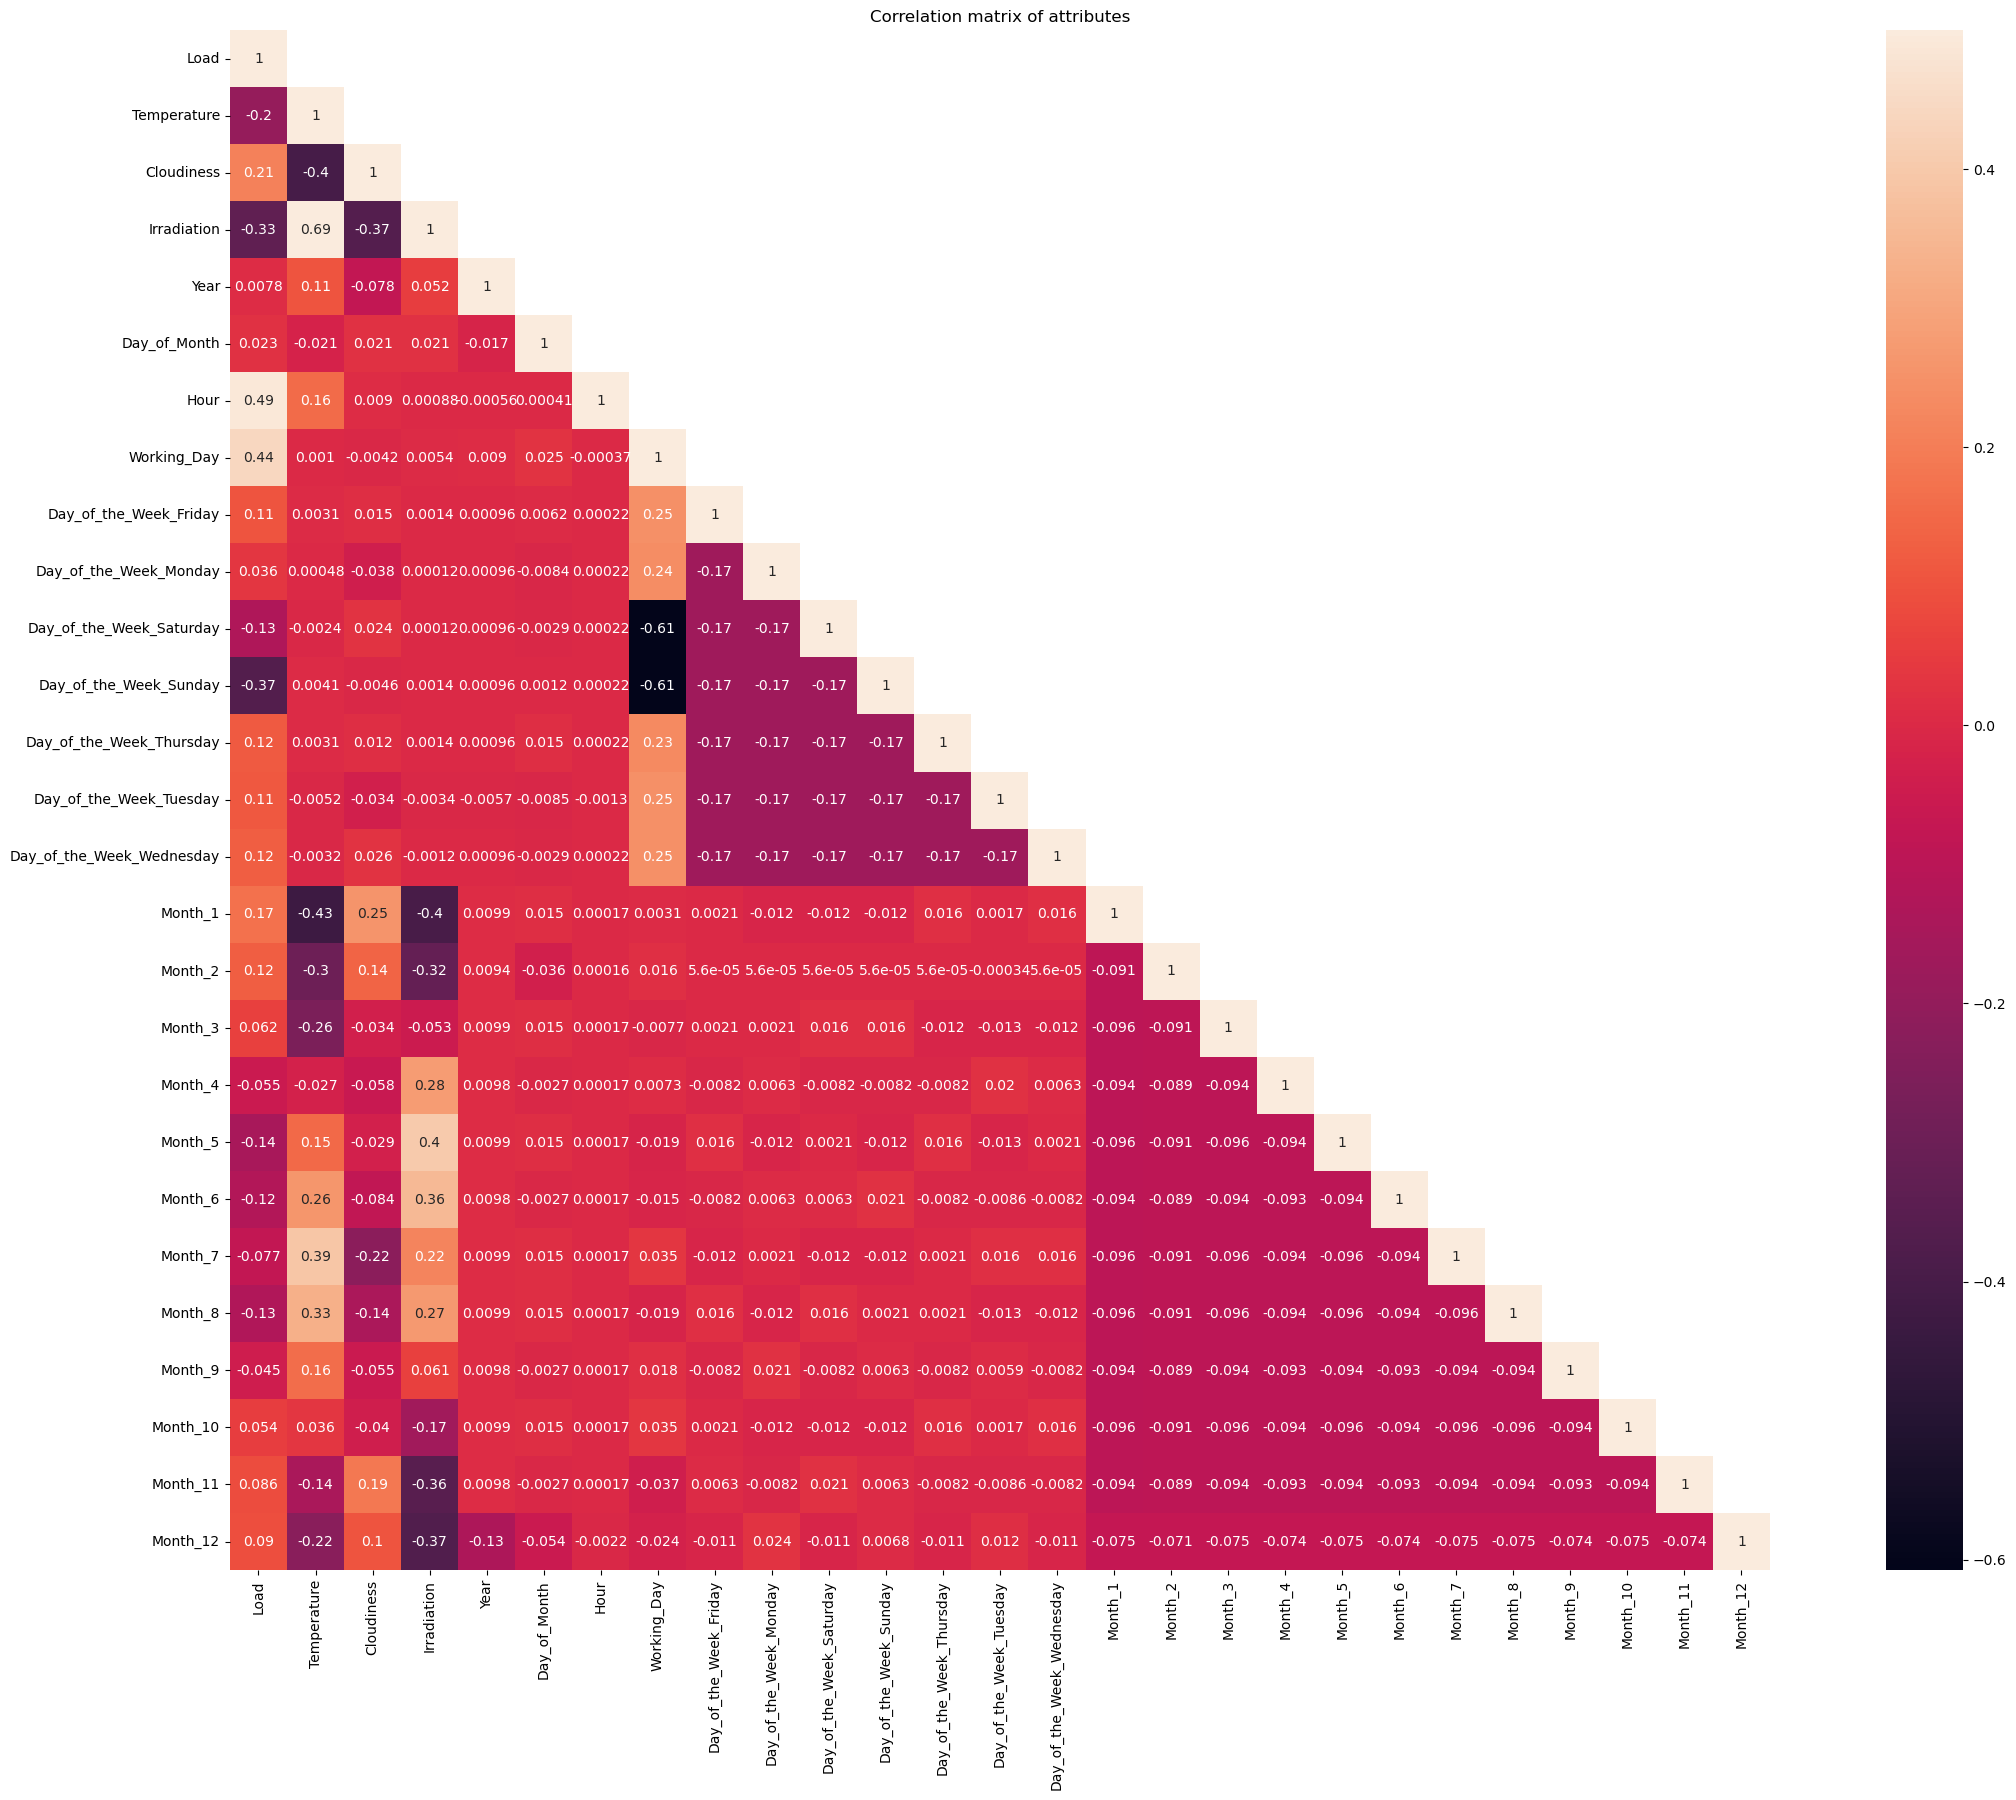

In [25]:
correMtr = df_r.corr()
mask = np.array(correMtr)
mask[np.tril_indices_from(mask)] = False

# Heat map for correlation matrix of attributes
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(correMtr, mask=mask, vmax=0.5, square=True, annot=True, ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

 <a id="8d"></a>
<h3>Observation from Correlation Matrix</h3>
 


1. Dummy Variables created for the *Day_of_the_Week* is has multicollinearity with *Working_Day*
2. Most of the *Day_of_the_Week* dummy varibales are loosely connected with the target varibale *Load*
3. Most of the *Month_* * dummy varibales are loosely connected with the target varibale *Load*
4. *Year* , *Day_of_Month* variables are loosely connected with the target varibale *Load*


<h4>Conclusions </h4>

It is acceptable to remove the all dummy varibales created for **Day_of_the_Week**  and all dummy varibales created for **Month**  to remove multicollinearity and to remove the bias.

It is acceptable to remove **Year** , **Month** , **Day_of_Month** variables 

 <a id="8e"></a>
 <h3>Removing  Multicorrelated and Loosely Connected Features</h3>   

In [26]:
df_cleaned = df_r.drop(columns=
                 
['Day_of_the_Week_Monday','Day_of_the_Week_Tuesday', 'Day_of_the_Week_Wednesday','Day_of_the_Week_Thursday',
 'Day_of_the_Week_Friday','Day_of_the_Week_Saturday','Day_of_the_Week_Sunday','Month_1','Month_2','Month_3','Month_4',
 'Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12', 'Year','Day_of_Month'] )
df_cleaned 

,Load,Temperature,Cloudiness,Irradiation,Hour,Working_Day
0,14859.10,4.40,4.00,0.20,0,0
1,14116.10,4.70,4.70,0.20,1,0
2,13400.80,4.70,4.70,0.20,2,0
3,12883.60,4.70,4.70,0.20,3,0
4,12717.30,4.40,4.20,0.20,4,0
...,...,...,...,...,...,...
16971,16457.30,1.30,7.00,0.10,3,1
16972,16744.80,-0.10,5.90,0.10,4,1
16973,17577.10,-0.10,5.90,0.10,5,1
16974,20253.70,-0.10,5.90,0.10,6,1


 <a id="8f"></a>
 <h3>Identifying Important Features with XGBoost Algorithm</h3>   

In [27]:
def  XGB_embedded(x, y):
    # Create the XGBRegressor
    model = XGBRegressor()
    # Fit the model
    model.fit(x, y)
    # Get the importance of the resulting features
    importances = model.feature_importances_
    # Create a DataFrame for visualization
    final_df = pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
    final_df.set_index('Importances', inplace=True)
    # Sort in ascending order for better visualization
    final_df = final_df.sort_values('Importances', ascending=False)
    return final_df

In [28]:
pd.options.display.float_format = "{:.5f}".format
XGB_embedded(x=df_cleaned.drop(["Load"],axis=1),y=df_cleaned["Load"])

,Features
Importances,
0.48359,Working_Day
0.36934,Hour
0.11296,Irradiation
0.02516,Temperature
0.00894,Cloudiness


Even though thefeature importance of XG Boost shows that cloudiness is not very much of important feature ,it was decided to keep cloudiness in the dataset as it shows considerable correlation with load in the correlation matrix

In [29]:
df_cleaned.describe()

,Load,Temperature,Cloudiness,Irradiation,Hour,Working_Day
count,16976.00000,16976.00000,16976.00000,16976.00000,16976.00000,16976.00000
mean,18045.58241,9.88281,4.74396,0.59793,11.49623,0.68897
std,2981.37274,8.06501,1.95163,0.30899,6.92312,0.46293
min,10494.00000,-14.00000,0.00000,0.10000,0.00000,0.00000
25%,15559.40000,3.60000,3.30000,0.30000,5.00000,0.00000
50%,18306.60000,10.50000,4.90000,0.60000,11.00000,1.00000
75%,20313.42500,15.90000,6.30000,0.90000,17.00000,1.00000
max,25459.00000,32.20000,8.00000,1.00000,23.00000,1.00000


 <a id="8g"></a>
 <h3>Standardization</h3>   



The features in this dataset have different ranges. For example, 'Irradiation' ranges from around 0.1 to 1, while 'Temperature' ranges from -14 to 32.2. Min-Max normalization scales the values of each feature to a fixed range,  between 0 and 1, which would address this issue.

Min-Max scaling can help prevent features with larger magnitudes from dominating the learning process, which can lead to a more balanced model.

In [30]:
# Select features to be scaled
features_to_scale = ['Temperature', 'Cloudiness', 'Irradiation']

# Apply Min-Max scaling to selected features
scaler = MinMaxScaler()
df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])
df_cleaned

,Load,Temperature,Cloudiness,Irradiation,Hour,Working_Day
0,14859.10000,0.39827,0.50000,0.11111,0,0
1,14116.10000,0.40476,0.58750,0.11111,1,0
2,13400.80000,0.40476,0.58750,0.11111,2,0
3,12883.60000,0.40476,0.58750,0.11111,3,0
4,12717.30000,0.39827,0.52500,0.11111,4,0
...,...,...,...,...,...,...
16971,16457.30000,0.33117,0.87500,0.00000,3,1
16972,16744.80000,0.30087,0.73750,0.00000,4,1
16973,17577.10000,0.30087,0.73750,0.00000,5,1
16974,20253.70000,0.30087,0.73750,0.00000,6,1


 <a id="8h"></a>
 <h3>Dimesionality Reduction</h3>   

This dataset doesnot need any dimensionality reduction.

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. It is often used when the number of features is very large, as this can lead to problems such as overfitting and slow computation. There are a variety of techniques that can be used for dimensionality reduction, such as principal component analysis (PCA).

There are several reasons why dimensionality reduction might be useful. One reason is that it can help to reduce the size of a dataset, which can be particularly useful when the dataset is very large. It can also help to improve the performance of machine learning models by reducing the number of features that the model has to consider, which can lead to faster computation and better generalization to new data.Another reason to use dimensionality reduction is to reduce the curse of dimensionality, which refers to the fact that as the number of dimensions increases, the volume of the space increases exponentially. 


 <a id="8i"></a>
 <h3> Splitting Data</h3>   


In [31]:
# Split your data to train and test. split into 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop("Load",axis=1),df_cleaned["Load"], test_size = 0.2, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (13580, 5)
Number transactions y_train dataset:  (13580,)
Number transactions X_test dataset:  (3396, 5)
Number transactions y_test dataset:  (3396,)


<a id="8j"></a>
<h3>Summary of the Section</h3>

• Weekend_Weekday , PublicHolidays   and Date columns were removed from the dataset as there are other columns that captures the information of these features<br>
• Encording (one hot encording for Day_of_the_Week and Label encording for Working_Day) was done to the categorical features.<br>
• Correlation matrix was created and relationship, multicolinarity of features are observed.<br>
• XGB algorithm was used to identify and confirm the important features<br>
• Normalization (min-max scaler) was applied to Temperature ,Cloudiness and Irradiation features<br>
• No dimenionality Reduction was applied <br>
• Data was splitted to train and test with 80-20 basis (80% data to train set)<br>

 <a id="9"></a>

# 9.  Model Training Appoach 1 - Regression with Machine Learning 

<a id="9a"></a>
<h3>  Grid Search based Hyperparameter Tuning with 5-Fold Cross-Validation </h3>


A function was created to do hyperparameter tuning with grid search with 5 fold cross validation.
It will produce 
1. Best parameters after optimization
2. Train and test Score of the R^2
3. Train and test Score of the Mean Squared Error (MSE)
4. Train and test Score of the Root Mean Squared Error (RMSE)
5. Train and test Score of the Mean Absolute Error (MAE)
6. Time taken for the output production with grid search



In [32]:

def best_parameter(models, parameters):
    
    # Checking time to process (start to end)
    start = time.time()

    # Create a KFold cross-validation object with 5 folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Use grid for testing different models and their best parameters
    grid = GridSearchCV(models, 
                        param_grid=parameters, 
                        refit=True, 
                        cv=kf, 
                        n_jobs=-1)
    
    # Fit X_train and y_train with models and parameters
    grid_fit = grid.fit(X_train, y_train)
    
    # Predict y_train with best model and best parameters
    y_train_pred = grid_fit.predict(X_train)
    
    # Predict y_test with best model and best parameters
    y_test_pred = grid_fit.predict(X_test)
    
    # Calculate R^2 score for train and test
    train_score = grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    
    # Calculate mean squared error (MSE) for train and test
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Calculate root mean squared error (RMSE) for train and test
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    # Calculate mean absolute error (MAE) for train and test
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Create model name for display in the print statement
    model_name = str(models).split('(')[0]
    
    # Checking time to process (start to end)
    end = time.time()
    
    # Best model with its best parameters
    best_model = grid_fit.best_estimator_
    
    # Print scores and errors such as R^2, MSE, and MAE

    print(f"The best parameters for {model_name} model are: {grid_fit.best_params_}")
    print("**" * 12)
    print(f"R^2 score in the training set is {train_score:.4f} for {model_name} model.")
    print(f"R^2 score in the testing set is {test_score:.4f} for {model_name} model.", "\n")
    print('---------------------------------------------------------')
    
    print(f"Mean Squared Error (MSE) in the training set is {train_mse:.4f} for {model_name} model.")
    print(f"Mean Squared Error (MSE) in the testing set is {test_mse:.4f} for {model_name} model.", "\n")
    print('---------------------------------------------------------')
    
    print(f"Root Mean Squared Error (RMSE) in the training set is {train_rmse:.4f} for {model_name} model.")
    print(f"Root Mean Squared Error (RMSE) in the testing set is {test_rmse:.4f} for {model_name} model.", "\n")
    print('---------------------------------------------------------')
    
    print(f"Mean Absolute Error (MAE) in the training set is {train_mae:.4f} for {model_name} model.")
    print(f"Mean Absolute Error (MAE) in the testing set is {test_mae:.4f} for {model_name} model.", "\n")
    print('---------------------------------------------------------')
        
    print(f"Runtime of the program is: {end - start:.3f}")
    
    # Return train and test scores and errors, and the best model
    return train_score, test_score, train_mse, test_mse, train_rmse, test_rmse, train_mae, test_mae, best_model


 <a id="91"></a>
<h3> 1.  Linear Regression </h3>

In [33]:
lr = LinearRegression()
parameter_lr = {'fit_intercept': [True, False]}

In [34]:
lr_train_score, lr_test_score, lr_train_mse ,lr_test_mse, lr_train_rmse ,lr_test_rmse,lr_train_mae,lr_test_mae,lr_best_model= best_parameter(lr, parameter_lr)

The best parameters for LinearRegression model are: {'fit_intercept': True}
************************
R^2 score in the training set is 0.5582 for LinearRegression model.
R^2 score in the testing set is 0.5495 for LinearRegression model. 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 3944129.5004 for LinearRegression model.
Mean Squared Error (MSE) in the testing set is 3933900.9912 for LinearRegression model. 

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 1985.9833 for LinearRegression model.
Root Mean Squared Error (RMSE) in the testing set is 1983.4064 for LinearRegression model. 

---------------------------------------------------------
Mean Absolute Error (MAE) in the training set is 1651.8870 for LinearRegression model.
Mean Absolute Error (MAE) in the testing set is 1650.9996 for LinearRegression model. 

-------------------------------------------------

 <a id="92"></a>
<h3> 2. Ridge Regression

In [35]:
rg = Ridge()
parameter_rg =  {    'alpha': [0.1, 1.0, 10.0],  # Regularization parameter
                    'fit_intercept': [True, False],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}

In [36]:
rg_train_score, rg_test_score, rg_train_mse ,rg_test_mse, rg_train_rmse ,rg_test_rmse,rg_train_mae,rg_test_mae,rg_best_model= best_parameter(rg, parameter_rg)

The best parameters for Ridge model are: {'alpha': 1.0, 'fit_intercept': True, 'solver': 'svd'}
************************
R^2 score in the training set is 0.5582 for Ridge model.
R^2 score in the testing set is 0.5495 for Ridge model. 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 3944129.9864 for Ridge model.
Mean Squared Error (MSE) in the testing set is 3933878.1408 for Ridge model. 

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 1985.9834 for Ridge model.
Root Mean Squared Error (RMSE) in the testing set is 1983.4007 for Ridge model. 

---------------------------------------------------------
Mean Absolute Error (MAE) in the training set is 1651.9321 for Ridge model.
Mean Absolute Error (MAE) in the testing set is 1651.0386 for Ridge model. 

---------------------------------------------------------
Runtime of the program is: 1.332


 <a id="93"></a>

<h3>3. Lasso Regression

In [37]:
ls=Lasso()
parameter_ls = {'alpha': [0.01,0.1, 1.0, 10.0],  # Regularization parameter
                 'fit_intercept': [True, False]}

In [38]:
ls_train_score, ls_test_score, ls_train_mse ,ls_test_mse, ls_train_rmse ,ls_test_rmse,ls_train_mae,ls_test_mae,ls_best_model= best_parameter(ls, parameter_ls)

The best parameters for Lasso model are: {'alpha': 0.1, 'fit_intercept': True}
************************
R^2 score in the training set is 0.5582 for Lasso model.
R^2 score in the testing set is 0.5495 for Lasso model. 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 3944129.9332 for Lasso model.
Mean Squared Error (MSE) in the testing set is 3933893.7227 for Lasso model. 

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 1985.9834 for Lasso model.
Root Mean Squared Error (RMSE) in the testing set is 1983.4046 for Lasso model. 

---------------------------------------------------------
Mean Absolute Error (MAE) in the training set is 1651.9069 for Lasso model.
Mean Absolute Error (MAE) in the testing set is 1651.0145 for Lasso model. 

---------------------------------------------------------
Runtime of the program is: 0.173


 <a id="94"></a>
<h3>4. Support vector regressor

In [39]:
svm=SVR()
parameter_svm= {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0]} #controls the trade-off between a smooth decision boundary and accuracy of the model

In [40]:
svm_train_score, svm_test_score, svm_train_mse ,svm_test_mse, svm_train_rmse ,svm_test_rmse,svm_train_mae,svm_test_mae,svm_best_model= best_parameter(svm, parameter_svm)

The best parameters for SVR model are: {'C': 100.0, 'kernel': 'rbf'}
************************
R^2 score in the training set is 0.7360 for SVR model.
R^2 score in the testing set is 0.7311 for SVR model. 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 2357010.3796 for SVR model.
Mean Squared Error (MSE) in the testing set is 2348467.8955 for SVR model. 

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 1535.2558 for SVR model.
Root Mean Squared Error (RMSE) in the testing set is 1532.4712 for SVR model. 

---------------------------------------------------------
Mean Absolute Error (MAE) in the training set is 1194.3931 for SVR model.
Mean Absolute Error (MAE) in the testing set is 1194.2323 for SVR model. 

---------------------------------------------------------
Runtime of the program is: 191.647


 <a id="95"></a>
<h3>5. Random Forest Regressor

In [41]:
rf = RandomForestRegressor()

# parameters
parameter_rf ={'n_estimators' :[50,100,150,200],
              'max_depth' :[4,6,8,10],
              'min_samples_split' :[40,50,60],
              'min_samples_leaf' : [30,40,50]}

In [42]:
rf_train_score, rf_test_score, rf_train_mse ,rf_test_mse, rf_train_rmse ,rf_test_rmse,rf_train_mae,rf_test_mae,rf_best_model= best_parameter(rf, parameter_rf)

The best parameters for RandomForestRegressor model are: {'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 60, 'n_estimators': 200}
************************
R^2 score in the training set is 0.9213 for RandomForestRegressor model.
R^2 score in the testing set is 0.9113 for RandomForestRegressor model. 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 702549.8147 for RandomForestRegressor model.
Mean Squared Error (MSE) in the testing set is 774522.1707 for RandomForestRegressor model. 

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 838.1824 for RandomForestRegressor model.
Root Mean Squared Error (RMSE) in the testing set is 880.0694 for RandomForestRegressor model. 

---------------------------------------------------------
Mean Absolute Error (MAE) in the training set is 612.5999 for RandomForestRegressor model.
Mean Absolute Error (MAE) in the testi

 <a id="96"></a>
<h3>6. XGB regressor

In [43]:
xgb = XGBRegressor()
parameter_xgb ={'n_estimators' :[50,100,150], #number of trees
              'max_depth' :[4,6,8], #The maximum depth of a tree
              'lambda':[0.0,0.01, 0.1, 1.0], # 	L2 regularization term on weightsto reducing overfitting
             'subsample':[0.6, 0.8, 1.0]} #fraction of observations to be randomly sampled for each tree.

In [44]:
xgb_train_score, xgb_test_score, xgb_train_mse ,xgb_test_mse, xgb_train_rmse ,xgb_test_rmse,xgb_train_mae,xgb_test_mae,xgb_best_model= best_parameter(xgb, parameter_xgb)

The best parameters for XGBRegressor model are: {'lambda': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
************************
R^2 score in the training set is 0.9974 for XGBRegressor model.
R^2 score in the testing set is 0.9742 for XGBRegressor model. 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 23223.2667 for XGBRegressor model.
Mean Squared Error (MSE) in the testing set is 225533.7994 for XGBRegressor model. 

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 152.3918 for XGBRegressor model.
Root Mean Squared Error (RMSE) in the testing set is 474.9040 for XGBRegressor model. 

---------------------------------------------------------
Mean Absolute Error (MAE) in the training set is 109.9765 for XGBRegressor model.
Mean Absolute Error (MAE) in the testing set is 320.3311 for XGBRegressor model. 

---------------------------------------------

 <a id="97"></a>

<h3>7. Cat Boost Regressor

In [45]:
cbr=CatBoostRegressor(verbose=False)
parameter_cbr = {
    'iterations': [300,350,400],
    'learning_rate': [0.01,0.1,1],
    'depth': [10,12,14]}

In [46]:
cbr_train_score, cbr_test_score, cbr_train_mse ,cbr_test_mse, cbr_train_rmse ,cbr_test_rmse,cbr_train_mae,cbr_test_mae,cbr_best_model= best_parameter(cbr, parameter_cbr);

The best parameters for <catboost.core.CatBoostRegressor object at 0x000002024FE4A4A0> model are: {'depth': 10, 'iterations': 400, 'learning_rate': 1}
************************
R^2 score in the training set is 0.9979 for <catboost.core.CatBoostRegressor object at 0x000002024FE4A4A0> model.
R^2 score in the testing set is 0.9747 for <catboost.core.CatBoostRegressor object at 0x000002024FE4A4A0> model. 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 18643.8977 for <catboost.core.CatBoostRegressor object at 0x000002024FE4A4A0> model.
Mean Squared Error (MSE) in the testing set is 221105.9219 for <catboost.core.CatBoostRegressor object at 0x000002024FE4A4A0> model. 

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 136.5427 for <catboost.core.CatBoostRegressor object at 0x000002024FE4A4A0> model.
Root Mean Squared Error (RMSE) in the testing set is 470.2190 for <catboos

 <a id="98"></a>
<h3>8. Light GBM Regressor

In [47]:
lgb=LGBMRegressor(verbosity=-1)
parameter_lgb ={'n_estimators' :[200,300,400], #number of trees
              'max_depth' :[10,12,14], #The maximum depth of a tree
              'lambda':[0.01, 0.1, 1.0], # L2 regularization term on weightsto reducing overfitting
             'subsample':[0.1,0.2,0.3]} #fraction of observations to be randomly sampled for each tree.

In [48]:
lgb_train_score, lgb_test_score, lgb_train_mse ,lgb_test_mse, lgb_train_rmse ,lgb_test_rmse,lgb_train_mae,lgb_test_mae,lgb_best_model= best_parameter(lgb, parameter_lgb);

The best parameters for LGBMRegressor model are: {'lambda': 0.1, 'max_depth': 14, 'n_estimators': 400, 'subsample': 0.1}
************************
R^2 score in the training set is 0.9692 for LGBMRegressor model.
R^2 score in the testing set is 0.9495 for LGBMRegressor model. 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 274765.2277 for LGBMRegressor model.
Mean Squared Error (MSE) in the testing set is 440722.0695 for LGBMRegressor model. 

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 524.1805 for LGBMRegressor model.
Root Mean Squared Error (RMSE) in the testing set is 663.8690 for LGBMRegressor model. 

---------------------------------------------------------
Mean Absolute Error (MAE) in the training set is 380.4000 for LGBMRegressor model.
Mean Absolute Error (MAE) in the testing set is 481.5861 for LGBMRegressor model. 

----------------------------------

 <a id="99"></a>
<h3>9.  Gradient Boost Regressor

In [49]:
gbr = GradientBoostingRegressor()
parameter_gbr = {
    'n_estimators': [200,300,400],
    'learning_rate': [0.1, 0.2,0.5],
    'max_depth': [5,7,9],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1, 2, 3]
}

In [50]:
gbr_train_score, gbr_test_score, gbr_train_mse ,gbr_test_mse, gbr_train_rmse ,gbr_test_rmse,gbr_train_mae,gbr_test_mae,gbr_best_model= best_parameter(gbr, parameter_gbr);

The best parameters for GradientBoostingRegressor model are: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400}
************************
R^2 score in the training set is 0.9969 for GradientBoostingRegressor model.
R^2 score in the testing set is 0.9758 for GradientBoostingRegressor model. 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 27934.7126 for GradientBoostingRegressor model.
Mean Squared Error (MSE) in the testing set is 210976.0906 for GradientBoostingRegressor model. 

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 167.1368 for GradientBoostingRegressor model.
Root Mean Squared Error (RMSE) in the testing set is 459.3213 for GradientBoostingRegressor model. 

---------------------------------------------------------
Mean Absolute Error (MAE) in the training set is 116.4273 for GradientBoostingRegre

 <a id="910"></a>
<h3>10. Ensemble Voting Regressor </h3>

An ensemble Voting Regressor combines the predictions from multiple individual regression models and outputs the average (or weighted average) prediction as the final result. <br><br>

**Advatages of Ensemble Voting Regressor**<br><br>
Ensemble Voting Regressor can often lead to better predictive performance compared to individual base models, especially when the base models are diverse and make different types of errors. It helps in reducing overfitting and improving the robustness of the model.

<h4>Checking testing Scores to select the top 3 models for Voting Algorithm </h4>

In [51]:
models_test_score = pd.DataFrame({
    
    'Testing R^2 score': [lr_test_score, rg_test_score, ls_test_score, svm_test_score, rf_test_score, xgb_test_score, 
                          cbr_test_score, lgb_test_score, gbr_test_score],
   
    'Testing MSE score': [lr_test_mse, rg_test_mse, ls_test_mse, svm_test_mse, rf_test_mse, xgb_test_mse, 
                          cbr_test_mse, lgb_test_mse, gbr_test_mse],
    
    'Testing RMSE score': [lr_test_rmse, rg_test_rmse, ls_test_rmse, svm_test_rmse, rf_test_rmse, xgb_test_rmse, 
                          cbr_test_rmse, lgb_test_rmse, gbr_test_rmse],
   
    'Testing MAE score': [lr_test_mae, rg_test_mae, ls_test_mae, svm_test_mae, rf_test_mae, xgb_test_mae, 
                          cbr_test_mae, lgb_test_mae, gbr_test_mae]},
    index = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','Support Vctor Regressor', 'Random Forest Regression',
             'XGB Regressor', 'Cat Boost Regressor', 'Light GBM Regressor', 'Gradient Boost Regressor'])



cm = sns.light_palette("green", as_cmap=True)

# showing dataframe
models_test_score.sort_values(by='Testing R^2 score').style.background_gradient(cmap=cm)

,Testing R^2 score,Testing MSE score,Testing RMSE score,Testing MAE score
Linear Regression,0.549500,3933900.991199,1983.406411,1650.999627
Lasso Regression,0.549500,3933893.722695,1983.404579,1651.014461
Ridge Regression,0.549502,3933878.140806,1983.400651,1651.038555
Support Vctor Regressor,0.731059,2348467.895514,1532.471173,1194.232253
Random Forest Regression,0.911304,774522.170689,880.069412,647.987699
Light GBM Regressor,0.949530,440722.069523,663.869015,481.586143
XGB Regressor,0.974172,225533.799409,474.903990,320.331056
Cat Boost Regressor,0.974680,221105.921921,470.219015,304.199719
Gradient Boost Regressor,0.975840,210976.090552,459.321337,307.883021


<h4> Top 3 Model Conclusion </h4>

**Cat Boost Regressor,  Gradient Boost Regressor, XGBoost Regressor** are the Top performing models which has highest Testing R^2 Value and lowest Values in MSE, RMSE and MAE

#### Creating the Ensemble Voting Regressor

In [52]:
def voting_reg(model):
    # Start time
    start = time.time()
    
    # Fitting the model
    model.fit(X_train, y_train)

    # Predictions on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # End time
    end = time.time()
    # Show best parameters
    
    
    print(f"R^2 score in the training set is {train_score:.4f} ")
    print(f"R^2 score in the testing set is {test_score:.4f} \n")
        
    print('---------------------------------------------------------')
    
    print(f"Mean Squared Error (MSE) in the training set is {train_mse:.4f} ")
    print(f"Mean Squared Error (MSE) in the testing set is {test_mse:.4f}\n")
    print('---------------------------------------------------------')
    
    print(f"Root Mean Squared Error (RMSE) in the training set is {train_rmse:.4f} ")
    print(f"Root Mean Squared Error (RMSE) in the testing set is {test_rmse:.4f} \n")
    print('---------------------------------------------------------')
    
    print(f"Mean Absolute Error (MAE) in the training set is {train_mae:.4f} ")
    print(f"Mean Absolute Error (MAE) in the testing set is {test_mae:.4f}\n")
    print('---------------------------------------------------------')
        
    print(f"Runtime of the program is: {end - start:.3f}")
    
    return train_score,test_score,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae

Hard voting (take the average of the predictions from the 3 models) is considered over soft voting (take weighted average of the predictions from 3 models) for this model due to simplicity and robustness 

In [53]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators=[('gbr', gbr_best_model), ('xgb', xgb_best_model), ('cbr', cbr_best_model)])
vr_train_score,vr_test_score,vr_train_mse,vr_test_mse,vr_train_rmse,vr_test_rmse,vr_train_mae,vr_test_mae = voting_reg(vr)

R^2 score in the training set is 0.9980 
R^2 score in the testing set is 0.9795 

---------------------------------------------------------
Mean Squared Error (MSE) in the training set is 17414.6829 
Mean Squared Error (MSE) in the testing set is 178973.1703

---------------------------------------------------------
Root Mean Squared Error (RMSE) in the training set is 131.9647 
Root Mean Squared Error (RMSE) in the testing set is 423.0522 

---------------------------------------------------------
Mean Absolute Error (MAE) in the training set is 92.6834 
Mean Absolute Error (MAE) in the testing set is 278.8762

---------------------------------------------------------
Runtime of the program is: 11.077


<a id="9b"></a>
<h3> Training Testing Scores of Machine Learning Models Experimented</h3>


In [54]:
models_train_test_score = pd.DataFrame({
    'Training R^2 score': [lr_train_score, rg_train_score, ls_train_score, svm_train_score,  rf_train_score, xgb_train_score,
                           cbr_train_score,lgb_train_score, gbr_train_score, vr_train_score],
    'Testing R^2 score': [lr_test_score, rg_test_score, ls_test_score, svm_test_score, rf_test_score, xgb_test_score, 
                          cbr_test_score, lgb_test_score, gbr_test_score, vr_test_score],
    'Training MSE score': [lr_train_mse, rg_train_mse, ls_train_mse, svm_train_mse, rf_train_mse, xgb_train_mse, 
                          cbr_train_mse, lgb_train_mse, gbr_train_mse, vr_train_mse],
    'Testing MSE score': [lr_test_mse, rg_test_mse, ls_test_mse, svm_test_mse, rf_test_mse, xgb_test_mse, 
                          cbr_test_mse, lgb_test_mse, gbr_test_mse, vr_test_mse],
    'Training RMSE score': [lr_train_rmse, rg_train_rmse, ls_train_rmse, svm_train_rmse, rf_train_rmse, xgb_train_rmse, 
                          cbr_train_rmse, lgb_train_rmse, gbr_train_rmse, vr_train_rmse],
    'Testing RMSE score': [lr_test_rmse, rg_test_rmse, ls_test_rmse, svm_test_rmse, rf_test_rmse, xgb_test_rmse, 
                          cbr_test_rmse, lgb_test_rmse, gbr_test_rmse, vr_test_rmse],
    'Training MAE score': [lr_train_mae, rg_train_mae, ls_train_mae, svm_train_mae, rf_train_mae, xgb_train_mae, 
                          cbr_train_mae, lgb_train_mae, gbr_train_mae, vr_train_mae],
    'Testing MAE score': [lr_test_mae, rg_test_mae, ls_test_mae, svm_test_mae, rf_test_mae, xgb_test_mae, 
                          cbr_test_mae, lgb_test_mae, gbr_test_mae, vr_test_mae]},
    index = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','Support Vctor Regressor', 'Random Forest Regression',
             'XGB Regressor', 'Cat Boost Regressor', 'Light GBM Regressor', 'Gradient Boost Regressor', 'Voting Regressor'])



cm = sns.light_palette("blue", as_cmap=True)

# showing dataframe
models_train_test_score.sort_values(by='Testing R^2 score').style.background_gradient(cmap=cm)

,Training R^2 score,Testing R^2 score,Training MSE score,Testing MSE score,Training RMSE score,Testing RMSE score,Training MAE score,Testing MAE score
Linear Regression,0.558154,0.549500,3944129.500440,3933900.991199,1985.983258,1983.406411,1651.887048,1650.999627
Lasso Regression,0.558154,0.549500,3944129.933212,3933893.722695,1985.983367,1983.404579,1651.906866,1651.014461
Ridge Regression,0.558154,0.549502,3944129.986384,3933878.140806,1985.983380,1983.400651,1651.932052,1651.038555
Support Vctor Regressor,0.735953,0.731059,2357010.379585,2348467.895514,1535.255803,1532.471173,1194.393117,1194.232253
Random Forest Regression,0.921296,0.911304,702549.814706,774522.170689,838.182447,880.069412,612.599906,647.987699
Light GBM Regressor,0.969219,0.949530,274765.227653,440722.069523,524.180530,663.869015,380.399985,481.586143
XGB Regressor,0.997398,0.974172,23223.266729,225533.799409,152.391820,474.903990,109.976513,320.331056
Cat Boost Regressor,0.997911,0.974680,18643.897715,221105.921921,136.542659,470.219015,98.144600,304.199719
Gradient Boost Regressor,0.996871,0.975840,27934.712639,210976.090552,167.136808,459.321337,116.427325,307.883021
Voting Regressor,0.998049,0.979504,17414.682857,178973.170316,131.964703,423.052208,92.683398,278.876210


<a id="9c"></a>
<h3>Summary of the Section</h3>
<br>

•  Machine Learning Algorithms choosed for the experiment namely,<br>
    1. Linear Regression<br>
    2. Lasso Regression<br>
    3. Ridge Regression<br>
    4. Support Vctor Regressor <br>
    5. Random Forest Regression <br>
    6. Light GBM Regressor<br>
    7. XGB Regressor<br>
    8. Cat Boost Regressor<br>
    9. Gradient Boost Regressor<br>

•  Each algorithm was evaluated after optimizing the model with grid search based hyperparameter tuning with 5 fold cross validation<br><br>
• Top performing alorithms were XGB Regressor,Cat Boost Regressor	 and Gradient Boost Regressor  based on testing r^2 score, MSE,RMSE,MAE<br><br>
•  For better performance ensemble voting alogorithm was created with these 3 best performing algorithms with hard voting method<br><br>
•  Ensmble Voting Algorithms outperforms and gives better performace  and it was considered as highly performing Machine Learning Alorithms from all the experimented  ML algorithms<br><br>

 <a id="10"></a>

# 10.  Appoach 2 - Regression with Deep Neural Network


<a id="10a"></a>
<h3> Neural Network Model</h3>

In [55]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

In [56]:
# Compile the model with mean squared error loss and mean average error metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8)

Epoch 1/100
1698/1698 [==============================] - 4s 2ms/step - loss: 20027532.0000 - mae: 2898.8735 - val_loss: 4846546.5000 - val_mae: 1793.5583
Epoch 2/100
1698/1698 [==============================] - 3s 2ms/step - loss: 4678442.0000 - mae: 1752.6046 - val_loss: 4049238.5000 - val_mae: 1625.3450
Epoch 3/100
1698/1698 [==============================] - 3s 2ms/step - loss: 4407124.0000 - mae: 1715.3329 - val_loss: 3905346.0000 - val_mae: 1632.2642
Epoch 4/100
1698/1698 [==============================] - 3s 2ms/step - loss: 3122973.0000 - mae: 1414.4296 - val_loss: 1829639.1250 - val_mae: 1033.9537
Epoch 5/100
1698/1698 [==============================] - 3s 2ms/step - loss: 1855248.0000 - mae: 1061.5001 - val_loss: 1509813.1250 - val_mae: 991.5057
Epoch 6/100
1698/1698 [==============================] - 3s 2ms/step - loss: 1647856.8750 - mae: 1003.7760 - val_loss: 1329916.8750 - val_mae: 916.2830
Epoch 7/100
1698/1698 [==============================] - 3s 2ms/step - loss: 147656

In [57]:
# Predict the values of y for the train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 score for train and test
dnn_train_score = r2_score(y_train, y_train_pred)
dnn_test_score = r2_score(y_test, y_test_pred)

# Calculate mean squared error (MSE) for train and test
dnn_train_mse = mean_squared_error(y_train, y_train_pred)
dnn_test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error (RMSE) for train and test
dnn_train_rmse = np.sqrt(dnn_train_mse)
dnn_test_rmse = np.sqrt(dnn_test_mse)

# Calculate mean absolute error (MAE) for train and test
dnn_train_mae = mean_absolute_error(y_train, y_train_pred)
dnn_test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the scores
print(f"R^2 score in the training set is {dnn_train_score:.4f}")
print(f"R^2 score in the testing set is {dnn_test_score:.4f}")

print(f"Mean Squared Error (MSE) in the training set is {dnn_train_mse:.4f}")
print(f"Mean Squared Error (MSE) in the testing set is {dnn_test_mse:.4f}")

print(f"Root Mean Squared Error (RMSE) in the training set is {dnn_train_rmse:.4f}")
print(f"Root Mean Squared Error (RMSE) in the testing set is {dnn_test_rmse:.4f}")

print(f"Mean Absolute Error (MAE) in the training set is {dnn_train_mae:.4f}")
print(f"Mean Absolute Error (MAE) in the testing set is {dnn_test_mae:.4f}")

107/107 [==============================] - 0s 1ms/step
R^2 score in the training set is 0.9195
R^2 score in the testing set is 0.9137
Mean Squared Error (MSE) in the training set is 718357.5330
Mean Squared Error (MSE) in the testing set is 753257.7126
Root Mean Squared Error (RMSE) in the training set is 847.5598
Root Mean Squared Error (RMSE) in the testing set is 867.9042
Mean Absolute Error (MAE) in the training set is 643.1659
Mean Absolute Error (MAE) in the testing set is 662.0395


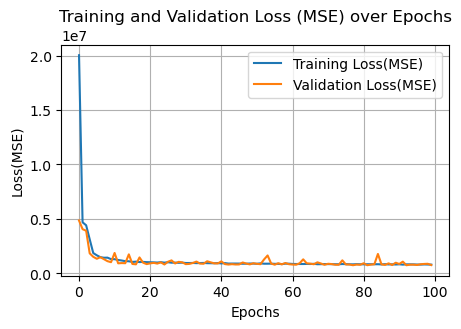

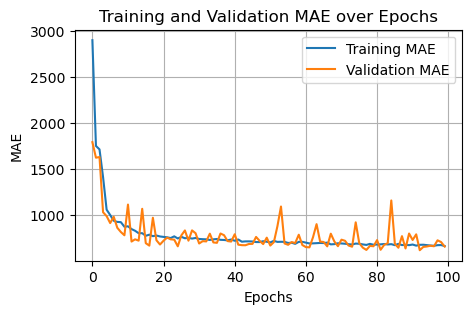

In [58]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training and validation loss
    plt.figure(figsize=(5, 3))
    plt.plot(history.history['loss'], label='Training Loss(MSE)')
    plt.plot(history.history['val_loss'], label='Validation Loss(MSE)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss(MSE)')
    plt.title('Training and Validation Loss (MSE) over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Plot training and validation MAE
    plt.figure(figsize=(5, 3))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('Training and Validation MAE over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    return

plot_history(history)

<a id="10b"></a>
<h3> Training Testing Scores of all Models Experimented</h3>


In [59]:
models_train_test_score = pd.DataFrame({
    'Training R^2 score': [lr_train_score, rg_train_score, ls_train_score, svm_train_score,  rf_train_score, xgb_train_score,
                           cbr_train_score,lgb_train_score, gbr_train_score, vr_train_score, dnn_train_score],
    'Testing R^2 score': [lr_test_score, rg_test_score, ls_test_score, svm_test_score, rf_test_score, xgb_test_score, 
                          cbr_test_score, lgb_test_score, gbr_test_score, vr_test_score, dnn_test_score],
    'Training MSE score': [lr_train_mse, rg_train_mse, ls_train_mse, svm_train_mse, rf_train_mse, xgb_train_mse, 
                          cbr_train_mse, lgb_train_mse, gbr_train_mse, vr_train_mse, dnn_train_mse],
    'Testing MSE score': [lr_test_mse, rg_test_mse, ls_test_mse, svm_test_mse, rf_test_mse, xgb_test_mse, 
                          cbr_test_mse, lgb_test_mse, gbr_test_mse,vr_test_mse, dnn_test_mse],
    'Training RMSE score': [lr_train_rmse, rg_train_rmse, ls_train_rmse, svm_train_rmse, rf_train_rmse, xgb_train_rmse, 
                          cbr_train_rmse, lgb_train_rmse, gbr_train_rmse,vr_train_rmse, dnn_train_rmse],
    'Testing RMSE score': [lr_test_rmse, rg_test_rmse, ls_test_rmse, svm_test_rmse, rf_test_rmse, xgb_test_rmse, 
                          cbr_test_rmse, lgb_test_rmse, gbr_test_rmse,vr_test_rmse, dnn_test_rmse],
    'Training MAE score': [lr_train_mae, rg_train_mae, ls_train_mae, svm_train_mae, rf_train_mae, xgb_train_mae, 
                          cbr_train_mae, lgb_train_mae, gbr_train_mae,vr_train_mae, dnn_train_mae],
    'Testing MAE score': [lr_test_mae, rg_test_mae, ls_test_mae, svm_test_mae, rf_test_mae, xgb_test_mae, 
                          cbr_test_mae, lgb_test_mae, gbr_test_mae, vr_test_mae,dnn_test_mae]},
    index = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','Support Vctor Regressor', 'Random Forest Regression',
             'XGB Regressor', 'Cat Boost Regressor', 'Light GBM Regressor', 'Gradient Boost Regressor', 'Voting Regressor','Deep Neural Network'])



cm = sns.light_palette("purple", as_cmap=True)

# showing dataframe
models_train_test_score.sort_values(by='Testing R^2 score').style.background_gradient(cmap=cm)

,Training R^2 score,Testing R^2 score,Training MSE score,Testing MSE score,Training RMSE score,Testing RMSE score,Training MAE score,Testing MAE score
Linear Regression,0.558154,0.549500,3944129.500440,3933900.991199,1985.983258,1983.406411,1651.887048,1650.999627
Lasso Regression,0.558154,0.549500,3944129.933212,3933893.722695,1985.983367,1983.404579,1651.906866,1651.014461
Ridge Regression,0.558154,0.549502,3944129.986384,3933878.140806,1985.983380,1983.400651,1651.932052,1651.038555
Support Vctor Regressor,0.735953,0.731059,2357010.379585,2348467.895514,1535.255803,1532.471173,1194.393117,1194.232253
Random Forest Regression,0.921296,0.911304,702549.814706,774522.170689,838.182447,880.069412,612.599906,647.987699
Deep Neural Network,0.919525,0.913739,718357.532992,753257.712562,847.559752,867.904207,643.165944,662.039461
Light GBM Regressor,0.969219,0.949530,274765.227653,440722.069523,524.180530,663.869015,380.399985,481.586143
XGB Regressor,0.997398,0.974172,23223.266729,225533.799409,152.391820,474.903990,109.976513,320.331056
Cat Boost Regressor,0.997911,0.974680,18643.897715,221105.921921,136.542659,470.219015,98.144600,304.199719
Gradient Boost Regressor,0.996871,0.975840,27934.712639,210976.090552,167.136808,459.321337,116.427325,307.883021


<a id="10c"></a>
<h3>Summary of the Section</h3>
<br>
•  Deep Neural network was created with 7 dense layers with relu activation function and 1 dense layer with linear activation function.<br>
•  Mean squared error is taken as loss function and mean absolute error was taken as metric <br>
•  100 epoches was used with batch size of 8<br>
•  Model was able to give r^2 score of 0.901853	, MSE of 857050.51, RMSE of 925.78, MAE of 690.59<br>


 <a id="11"></a>

# 11.  Appoach 3 - Time Series Model 


In the initial dataset there was a column Date and time which is unique.Hence we can utilize the time series model to predict the Load with Date  along with the help of the other features<br>


In [60]:
df_t = df.set_index('Date')

In [61]:
df_t = df_t.drop(columns=['Year','PublicHolidays','Month','Day_of_Month','Day_of_the_Week','Weekday_Weekend'])
label_encoder = LabelEncoder()
df_t['Working_Day'] = label_encoder.fit_transform(df_t['Working_Day'])
df_t = df_t.astype(float) 


In [62]:
df_t

,Load,Temperature,Cloudiness,Irradiation,Hour,Working_Day
Date,,,,,,
2013-01-01 00:00:00,14859.10000,4.40000,4.00000,0.20000,0.00000,0.00000
2013-01-01 01:00:00,14116.10000,4.70000,4.70000,0.20000,1.00000,0.00000
2013-01-01 02:00:00,13400.80000,4.70000,4.70000,0.20000,2.00000,0.00000
2013-01-01 03:00:00,12883.60000,4.70000,4.70000,0.20000,3.00000,0.00000
2013-01-01 04:00:00,12717.30000,4.40000,4.20000,0.20000,4.00000,0.00000
...,...,...,...,...,...,...
2014-12-09 03:00:00,16457.30000,1.30000,7.00000,0.10000,3.00000,1.00000
2014-12-09 04:00:00,16744.80000,-0.10000,5.90000,0.10000,4.00000,1.00000
2014-12-09 05:00:00,17577.10000,-0.10000,5.90000,0.10000,5.00000,1.00000


<a id="11a"></a>
<h3> Time Series SARIMA Model</h3>

SARIMA (Seasonal Autoregressive Integrated Moving Average) model,can include exogenous variables (features) along with the endogenous variable (target variable). Therefore SARIMA model was considered for the Time Series Model


In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

endog = df_t['Load']  # Time series data
exog = df_t[['Temperature', 'Cloudiness', 'Irradiation', 'Working_Day']]

# Split data into train and test sets
train_endog, test_endog = train_test_split(endog, test_size=0.2, shuffle=False)
train_exog, test_exog = train_test_split(exog, test_size=0.2, shuffle=False)

# Fit the ARIMA model
order = (5, 1, 0)  # Example order for SARIMAX model
model = SARIMAX(endog=train_endog, exog=train_exog, order=order)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_endog), exog=test_exog)  # Provide exogenous variables for forecasting

# Calculate Mean Squared Error
mse = mean_squared_error(test_endog, forecast)
print('Mean Squared Error:', mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
# Calculate Mean Absolute  Error
mae = mean_absolute_error(test_endog, forecast)
print('Mean Absolute Error:', mae)

C:\Users\rla\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\rla\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 11277140.184934378
Root Mean Squared Error: 3358.1453489886912
Mean Absolute Error: 2811.5582678203505


<a id="11b"></a>
<h3> Evaluation of the Time Series Model </h3>

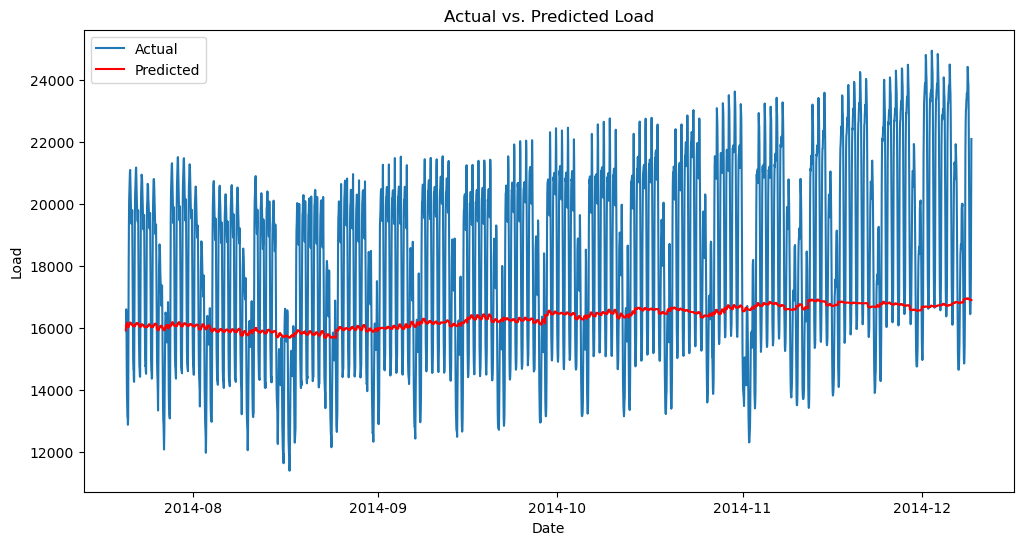

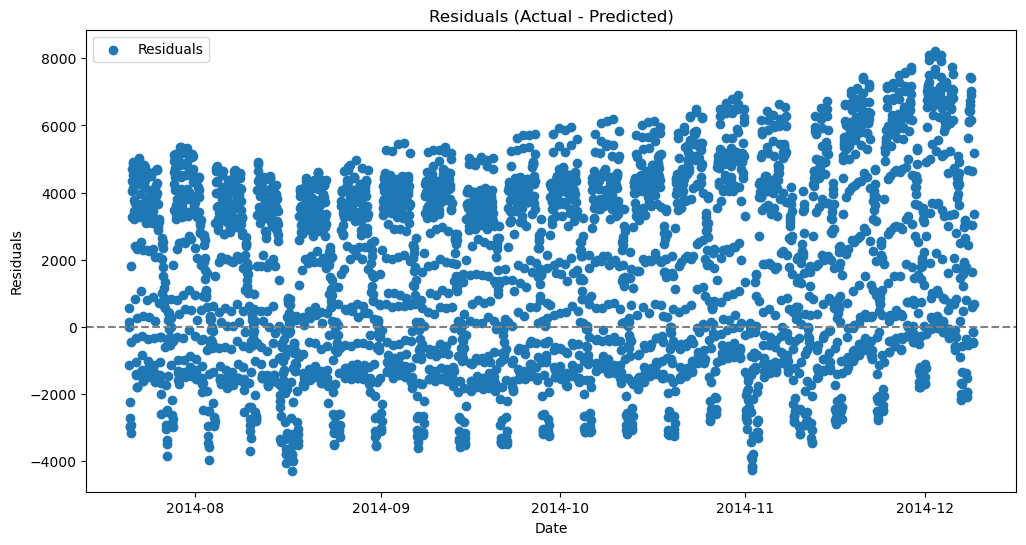

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(test_endog.index, test_endog, label='Actual')
plt.plot(test_endog.index, forecast, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Load')
plt.title('Actual vs. Predicted Load')
plt.legend()
plt.show()

# Detect anomalies
residuals = test_endog - forecast
plt.figure(figsize=(12, 6))
plt.scatter(test_endog.index, residuals, label='Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals (Actual - Predicted)')
plt.legend()
plt.show()

<a id="11c"></a>
<h3>Summary of the Section</h3>


•  SARIMA model was implemented with *Load* as endogenous variable and *Temperature*, *Cloudiness*, *Irradiation*, *Working_Day* as exogenous variables.<br> 

•  Hour was not given as input to the model as this inforation is already captured in the Date Columm (Date columns has date and hour relavant to the Load)<br>

•  Model performance on test data set was visually and statistically evaluated.<br>

•  SARIMA model has Mean Squared Error of 11277140.19, Root Mean Squared Error of 3358.14,Mean Absolute Error of 2811.56<br>

•  Time Series Model didnot perform well  when compared to machine learning models<br>




<a id="12"></a>
# 12. Saving the Best Model 




 • Best model out of all the experimented approaches and algorithms  is :
###### Ensemble Voting Regressor
• It has Highest R2Score and Lowest RMSE ,MSE and MAE . <br>
• Model was saved in pickel format so that it can be reused in future.<br>


Saving the model

In [65]:
import pickle

# Save the model to a file
with open('voting_regressor_model.pkl', 'wb') as file:
    pickle.dump(vr, file)

Using the saved model for predictions

In [66]:
# Load the model from the file
with open('voting_regressor_model.pkl', 'rb') as file:
    model_loaded = pickle.load(file)

<a id="13"></a>
# 13. Predictions from the Model



In [67]:
import pandas as pd

# Prompt the user to input the hour
hour = int(input("Enter the hour (0-23): "))

# Prompt the user to input whether it's a weekday or weekend
weekday_input = input("Is it a weekday? (y/n): ")
if weekday_input.lower() == 'n':
    weekday = 0
else:
    # Prompt the user to input whether it's a public holiday
    holiday_input = input("Is it a public holiday? (y/n): ")
    if holiday_input.lower() == 'y':
        weekday = 0
    else:
        weekday = 1  # Assuming it's a weekend and not a public holiday

# Prompt the user to input Temperature, Cloudliness, Irradiation
temperature = float(input("Enter the temperature: "))
cloudiness = float(input("Enter the cloudiness: "))
irradiation = float(input("Enter the irradiation: "))

# Create a DataFrame with the user inputs
data = {
    'Temperature': [temperature],
    'Cloudiness': [cloudiness],
    'Irradiation': [irradiation],
    'Hour': [hour],
    'Working_Day': [weekday]
}
user_df = pd.DataFrame(data)

print("User input DataFrame:")
print(user_df)
predictions = model_loaded.predict(user_df)
print('---------------------------------------------------------------------------')
# Print the predictions
print(f"Predicted load for {hour}H is : " ,predictions)


Enter the hour (0-23): 5
Is it a weekday? (y/n): y
Is it a public holiday? (y/n): y
Enter the temperature: 4
Enter the cloudiness: 1.5
Enter the irradiation: 2
User input DataFrame:
   Temperature  Cloudiness  Irradiation  Hour  Working_Day
0      4.00000     1.50000      2.00000     5            0
---------------------------------------------------------------------------
Predicted load for 5H is :  [13328.51125228]


<a id="14"></a>

# 14. StreamLit Application


StreamLit Application was created to get the user input that is needed for the prediction.Saved Ensemble Voting Regressor was used as the backend model to get the prediction

![Sample Image](images/st_app.png)

<a id="15"></a>

# 15. Future Work  and Further Improvements




### Future Work


• Create new feature by creating  3 new categories as morning, afternoon and night as lables and  experimenting model performances. <br><br>
• With having the information about the country which this data belongs to , it is possible to create a new feature namely 'seasons' from the Month column and can experiment the model performances.  <br><br>
• Implement the above with ML-Ops with git hub,Ml-flow ,DVC and doctorize the application.Make the CI/CD pipeline with github actions and deploy the model


### Further Improvements

• Neural Network model can be further experimented and improved by changing layers and activation functions.<br><br>
• Ensmeble Voting Regressor Model can be experimented and evaluated based on soft voting method as well.<br><br>
 


<a id="16"></a>

# 16. Answers to the Problem Statement


 ## 1. Plot and analyze the data and check the data quality
 

### Data Quality 

No missing Values in the dataset [Go to the section](#5c)<br>
No Duplicate values  [Go to the section](#5d)<br>
No Outliers detected [Go to the section](#7c)<br>
Corrected the unappropriate Data type (Date Column) [Go to the section](#6a)<br>

### Plot and analyze the data

Dataset was visualized after some feature engineering.
Attempt was made to visualize the relationship between target varibale(load) and the features(all other columns except load)[Go to the section](#7)<br>

## 2. Build a model and forecast for the next N hours

**12** Models were implemented and evaluated under 3 approaches <br>
1. Approach 1 - 10 Machine Algorithms were experimented with hyperparameter tuning and optimization [Go to the section](#9)<br>
2. Approach 2 - Deep Learning Model was implemented and experimented [Go to the section](#10)<br>
3. Approach 3 - Time Series SARIMA Model was implemented and experimented [Go to the section](#11)<br><br>

Out of all the approaches experimented Ensemble Voting regressor model out performed than all other models experimented. [Go to the section](#910) <br>
Hence the model was saved and used for the predictions [Go to the section](#13) <br>
StreamLit Application was made to get predictions in a user friendly way.[Go to the section](#14) (Saved Ensemble Voting regressor model was used as the back end model for the predictions)   <br>

## 3. Identify the normal and anomalous behavior on the time-series dataset that could act as early indicators for quality degradation.

When the average load was calculated over the months there was alarming pattern deviation in June. [Go to the section](#7b) 
<br> 2014 Data has deviated much from 2013 during that period.Hence re-evaluation or background check is needed to support this deviation. <br>
No Outliers detected which can lead to anomality [Go to the section](#7c)<br>
However this model can give misleading predictions if we use this to predict todays Load.It is because model is trained with  10 years back data which is outdated in the current context. 

## 4. Provide evaluation metrics for you model(s)

This problem is regression problem.Hence regression based evalution metrices are needed to measure the model performances.<br>

**1.Mean Absolute Error (MAE)**: <br>

MAE is the average of the absolute differences between predicted and actual values.<br>
It measures the average magnitude of errors in a set of predictions, without considering their direction.<br><br>

**2.Mean Squared Error (MSE)**:<br>

MSE is the average of the squared differences between predicted and actual values.<br>
It penalizes larger errors more heavily than MAE.<br><br>


**3.Root Mean Squared Error (RMSE)**:<br>

RMSE is the square root of the MSE.<br>
It provides the same scale of measurement as the target variable, making it easier to interpret.<br><br>

 
**4.Coefficient of Determination (R-squared)**:<br>

R-squared measures the proportion of the variance in the target variable that is explained by the model.<br>
It ranges from 0 to 1, where 1 indicates perfect predictions.<br><br>


Machine Learning and Deep learning models are evaluated based on the above metrices  [Go to the section](#10b)<br> 

Best performing Ensemble Voting Regressor model has r2 score of 0.979432 , MSE of 179608.72 , RMSE of 423.80 , MAE of 278.79

However Coefficient of Determination (R-squared) was not used and evalution metrics in Approach 3 (SARIMA model).[Go to the section](#11a)<br>
This is because SARIMA models are specifically designed for time series forecasting and are based on the temporal relationships within the data rather than the relationship between independent and dependent variables.